In [64]:
# Proyecto final Bueno
# Proyecto final Bueno
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn scipy


### 0.1Packages

In [65]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
import scipy

import warnings
warnings.filterwarnings('ignore')

### 1  Import-transformation of the variable 

In [66]:
UK = pd.read_csv("millenniumofdata_v3_headlines.csv", skiprows=[1])

In [67]:
display(UK)

Description  Real GDP of England at market prices  \
0           2016                             1672084.0   
1           2015                             1642802.0   
2           2014                             1604169.0   
3           2013                             1551553.0   
4           2012                             1530435.0   
..           ...                                   ...   
803         1213                                   NaN   
804         1212                                   NaN   
805         1211                                   NaN   
806         1210                                   NaN   
807         1209                                   NaN   

     Real GDP of England at factor cost   \
0                              1413759.0   
1                              1388074.0   
2                              1352028.0   
3                              1302596.0   
4                              1282939.0   
..                                   ...   
803                                  NaN   
804                                  NaN   
805                                  NaN   
806                                  NaN   
807                                  NaN   

     Real UK GDP at market prices, geographically-consistent estimate based on post-1922 borders  \
0                                            1865410.0                                             
1                                            1832318.0                                             
2                                            1792976.0                                             
3                                            1739563.0                                             
4                                            1706942.0                                             
..                                                 ...                                             
803                                                NaN                                             
804                                                NaN                                             
805                                                NaN                                             
806                                                NaN                                             
807                                                NaN                                             

     Real UK GDP at factor cost, geographically-consistent estimate based on post-1922 borders  \
0                                            1648678.0                                           
1                                            1618725.0                                           
2                                            1580198.0                                           
3                                            1527959.0                                           
4                                            1505417.0                                           
..                                                 ...                                           
803                                                NaN                                           
804                                                NaN                                           
805                                                NaN                                           
806                                                NaN                                           
807                                                NaN                                           

     Index of real UK GDP at factor cost - based on changing political boundaries,   \
0                                             872.4447                                
1                                             856.5943                                
2                                             836.2066                                
3                                             808.562

In [68]:
df=UK.copy()

In [69]:
df.head()

Description  Real GDP of England at market prices  \
0         2016                             1672084.0   
1         2015                             1642802.0   
2         2014                             1604169.0   
3         2013                             1551553.0   
4         2012                             1530435.0   

   Real GDP of England at factor cost   \
0                            1413759.0   
1                            1388074.0   
2                            1352028.0   
3                            1302596.0   
4                            1282939.0   

   Real UK GDP at market prices, geographically-consistent estimate based on post-1922 borders  \
0                                          1865410.0                                             
1                                          1832318.0                                             
2                                          1792976.0                                             
3                                          1739563.0                                             
4                                          1706942.0                                             

   Real UK GDP at factor cost, geographically-consistent estimate based on post-1922 borders  \
0                                          1648678.0                                           
1                                          1618725.0                                           
2                                          1580198.0                                           
3                                          1527959.0                                           
4                                          1505417.0                                           

   Index of real UK GDP at factor cost - based on changing political boundaries,   \
0                                           872.4447                                
1                                           856.5943                                
2                                           836.2066                                
3                                           808.5629                                
4                                           796.6341                                

   Composite estimate of English and (geographically-consistent) UK real GDP at factor cost  \
0                                           107.9007                                          
1                                           105.9403                                          
2                                           103.4189                                          
3                                           100.0000                                          
4                                            98.5247                                          

   HP-filter of log of real composite estimate of English and UK real GDP at factor cost  \
0                                               1.55                                       
1                                               1.09                                       
2                                               0.04                                       
3                                              -2.01                                       
4                                              -2.25                                       

   Real UK gross disposable national income at market prices, constant border estimate  \
0                                          1843502.0                                     
1                                          1793997.0                                     
2                                          1749880.0                                     
3                                          1702359.0                                     
4                                          1681556.0                                     

   Real consumption  ...  UK Public sector debt.1  UK Public sector deb

### 1.1 Variables we are going to use

In [70]:
#Real GDP of England at market prices
#Real consumption
#Real investment
#Employment
#$ Oil prices
#UK Public sector debt
#Terms of trade 
#Public sector Total Managed Expenditure
#M1
#House prices index 

### #1.2 Creating de DF

In [71]:

df1 = df[["Description", "Real GDP of England at market prices", "Real consumption", "Real investment",
            "Employment", "$ Oil prices", "UK Public sector debt", "Terms of Trade",
            "Public sector Total Managed Expenditure", "M1", "House price index"]]

In [72]:
df1.head()

Description  Real GDP of England at market prices  Real consumption  \
0         2016                             1672084.0         1223627.0   
1         2015                             1642802.0         1190789.0   
2         2014                             1604169.0         1163136.0   
3         2013                             1551553.0         1138546.0   
4         2012                             1530435.0         1121061.0   

   Real investment  Employment  $ Oil prices  UK Public sector debt  \
0         310816.0     31741.0         43.82              1701800.0   
1         309144.0     31296.0         52.39              1610500.0   
2         298872.0     30757.0         98.93              1556000.0   
3         280224.0     30044.0        108.66              1454000.0   
4         271534.0     29696.0        111.67              1349700.0   

   Terms of Trade  Public sector Total Managed Expenditure        M1  \
0          102.31                                 766473.0  802754.0   
1          102.27                                 752904.0  780106.0   
2          101.54                                 751173.0  734574.0   
3          100.00                                 730662.0  683952.0   
4           97.81                                 735765.0  617849.0   

   House price index  
0             111.36  
1             103.79  
2              97.96  
3              90.68  
4              88.40

### #1.3 Change the name of columns

In [73]:

df1.rename(columns={
    "Description": "Year",
    "Real GDP of England at market prices": "Real_GDP",
    "Real consumption": "Consumption",
    "Real investment": "Investment",
    "Employment": "Employment",
    "$ Oil prices": "Oil_Prices",
    "UK Public sector debt": "Public_Sector_Debt",
    "Terms of Trade": "TOT",
    "Public sector Total Managed Expenditure": "Total_Managed_Expenditure",
    "M1": "M1",
    "House price index": "HousePrice"
}, inplace=True)



In [74]:
df1.head()

Year   Real_GDP  Consumption  Investment  Employment  Oil_Prices  \
0  2016  1672084.0    1223627.0    310816.0     31741.0       43.82   
1  2015  1642802.0    1190789.0    309144.0     31296.0       52.39   
2  2014  1604169.0    1163136.0    298872.0     30757.0       98.93   
3  2013  1551553.0    1138546.0    280224.0     30044.0      108.66   
4  2012  1530435.0    1121061.0    271534.0     29696.0      111.67   

   Public_Sector_Debt     TOT  Total_Managed_Expenditure        M1  HousePrice  
0           1701800.0  102.31                   766473.0  802754.0      111.36  
1           1610500.0  102.27                   752904.0  780106.0      103.79  
2           1556000.0  101.54                   751173.0  734574.0       97.96  
3           1454000.0  100.00                   730662.0  683952.0       90.68  
4           1349700.0   97.81                   735765.0  617849.0       88.40

### 1.4  Display the DataFrame with the "Year" column as the index

In [75]:

df1.set_index("Year",inplace=True)


In [76]:
display(df1)

Real_GDP  Consumption  Investment  Employment  Oil_Prices  \
Year                                                               
2016  1672084.0    1223627.0    310816.0     31741.0       43.82   
2015  1642802.0    1190789.0    309144.0     31296.0       52.39   
2014  1604169.0    1163136.0    298872.0     30757.0       98.93   
2013  1551553.0    1138546.0    280224.0     30044.0      108.66   
2012  1530435.0    1121061.0    271534.0     29696.0      111.67   
...         ...          ...         ...         ...         ...   
1213        NaN          NaN         NaN         NaN         NaN   
1212        NaN          NaN         NaN         NaN         NaN   
1211        NaN          NaN         NaN         NaN         NaN   
1210        NaN          NaN         NaN         NaN         NaN   
1209        NaN          NaN         NaN         NaN         NaN   

      Public_Sector_Debt     TOT  Total_Managed_Expenditure        M1  \
Year                                                                    
2016           1701800.0  102.31                   766473.0  802754.0   
2015           1610500.0  102.27                   752904.0  780106.0   
2014           1556000.0  101.54                   751173.0  734574.0   
2013           1454000.0  100.00                   730662.0  683952.0   
2012           1349700.0   97.81                   735765.0  617849.0   
...                  ...     ...                        ...       ...   
1213                 NaN     NaN                        NaN       NaN   
1212                 NaN     NaN                        NaN       NaN   
1211                 NaN     NaN                        NaN       NaN   
1210                 NaN     NaN                        NaN       NaN   
1209                 NaN     NaN                        NaN       NaN   

      HousePrice  
Year              
2016      111.36  
2015      103.79  
2014       97.96  
2013       90.68  
2012       88.40  
...          ...  
1213         NaN  
1212         NaN  
1211         NaN  
1210         NaN  
1209         NaN  

[808 rows x 10 columns]

### 1.5 Null Values

In [77]:

df1.isna().sum()

Real_GDP                      61
Consumption                  621
Investment                   621
Employment                   646
Oil_Prices                   652
Public_Sector_Debt           482
TOT                          563
Total_Managed_Expenditure    691
M1                           713
HousePrice                   636
dtype: int64

In [78]:
df1.dropna(axis=0, inplace=True)

In [79]:
df1 # We end up with a database with 95 years and 10 colimns

Real_GDP  Consumption  Investment  Employment  Oil_Prices  \
Year                                                               
2016  1672084.0    1223627.0    310816.0     31741.0       43.82   
2015  1642802.0    1190789.0    309144.0     31296.0       52.39   
2014  1604169.0    1163136.0    298872.0     30757.0       98.93   
2013  1551553.0    1138546.0    280224.0     30044.0      108.66   
2012  1530435.0    1121061.0    271534.0     29696.0      111.67   
...         ...          ...         ...         ...         ...   
1926   191950.0     156780.0     16743.0     18537.0        1.88   
1925   198406.0     155908.0     17250.0     18532.0        1.68   
1924   191378.0     153246.0     15141.0     18322.0        1.43   
1923   182423.0     148335.0     12990.0     18051.0        1.34   
1922   176904.0     143929.0     12653.0     17821.0        1.61   

      Public_Sector_Debt     TOT  Total_Managed_Expenditure        M1  \
Year                                                                    
2016           1701800.0  102.31                   766473.0  802754.0   
2015           1610500.0  102.27                   752904.0  780106.0   
2014           1556000.0  101.54                   751173.0  734574.0   
2013           1454000.0  100.00                   730662.0  683952.0   
2012           1349700.0   97.81                   735765.0  617849.0   
...                  ...     ...                        ...       ...   
1926              7648.0   92.39                     1155.0    1476.0   
1925              7642.0   88.37                     1096.0    1491.0   
1924              7676.0   91.05                     1041.0    1519.0   
1923              7734.0   94.44                     1048.0    1537.0   
1922              7790.0   97.57                     1172.0    1563.0   

      HousePrice  
Year              
2016      111.36  
2015      103.79  
2014       97.96  
2013       90.68  
2012       88.40  
...          ...  
1926        0.26  
1925        0.26  
1924        0.24  
1923        0.23  
1922        0.21  

[95 rows x 10 columns]

### 2 Data analysis

In [80]:
df1.describe()

Real_GDP   Consumption     Investment    Employment  Oil_Prices  \
count  9.500000e+01  9.500000e+01      95.000000     95.000000   95.000000   
mean   7.104196e+05  4.907425e+05  132098.778947  24539.884211   18.111053   
std    4.583850e+05  3.384436e+05  100501.882425   3208.878998   27.096773   
min    1.769040e+05  1.439290e+05    7170.000000  17821.000000    0.650000   
25%    3.146170e+05  2.010925e+05   24271.500000  23398.500000    1.695000   
50%    5.969050e+05  3.627140e+05  138923.000000  24725.000000    2.080000   
75%    1.020780e+06  6.941740e+05  222956.500000  26065.000000   24.085000   
max    1.672084e+06  1.223627e+06  312995.000000  31741.000000  111.670000   

       Public_Sector_Debt         TOT  Total_Managed_Expenditure  \
count        9.500000e+01   95.000000                  95.000000   
mean         2.199856e+05   95.531895              165642.757895   
std          3.879074e+05    5.991166              234999.419001   
min          7.586000e+03   78.520000                1041.000000   
25%          2.436850e+04   91.780000                4925.500000   
50%          3.364200e+04   95.690000               20233.000000   
75%          2.138755e+05   99.040000              283823.500000   
max          1.701800e+06  107.170000              766473.000000   

                  M1  HousePrice  
count      95.000000   95.000000  
mean   125693.768421   21.134316  
std    210737.941426   31.944239  
min      1383.000000    0.210000  
25%      5397.500000    0.580000  
50%      9098.000000    2.080000  
75%    147491.500000   30.400000  
max    802754.000000  111.360000

In [81]:
df1 = df1.apply(pd.to_numeric, errors='coerce')

# Now, run describe() again
print(df1.describe())

           Real_GDP   Consumption     Investment    Employment  Oil_Prices  \
count  9.500000e+01  9.500000e+01      95.000000     95.000000   95.000000   
mean   7.104196e+05  4.907425e+05  132098.778947  24539.884211   18.111053   
std    4.583850e+05  3.384436e+05  100501.882425   3208.878998   27.096773   
min    1.769040e+05  1.439290e+05    7170.000000  17821.000000    0.650000   
25%    3.146170e+05  2.010925e+05   24271.500000  23398.500000    1.695000   
50%    5.969050e+05  3.627140e+05  138923.000000  24725.000000    2.080000   
75%    1.020780e+06  6.941740e+05  222956.500000  26065.000000   24.085000   
max    1.672084e+06  1.223627e+06  312995.000000  31741.000000  111.670000   

       Public_Sector_Debt         TOT  Total_Managed_Expenditure  \
count        9.500000e+01   95.000000                  95.000000   
mean         2.199856e+05   95.531895              165642.757895   
std          3.879074e+05    5.991166              234999.419001   
min          7.586000e+03

### 2.1 Graphics of the variable

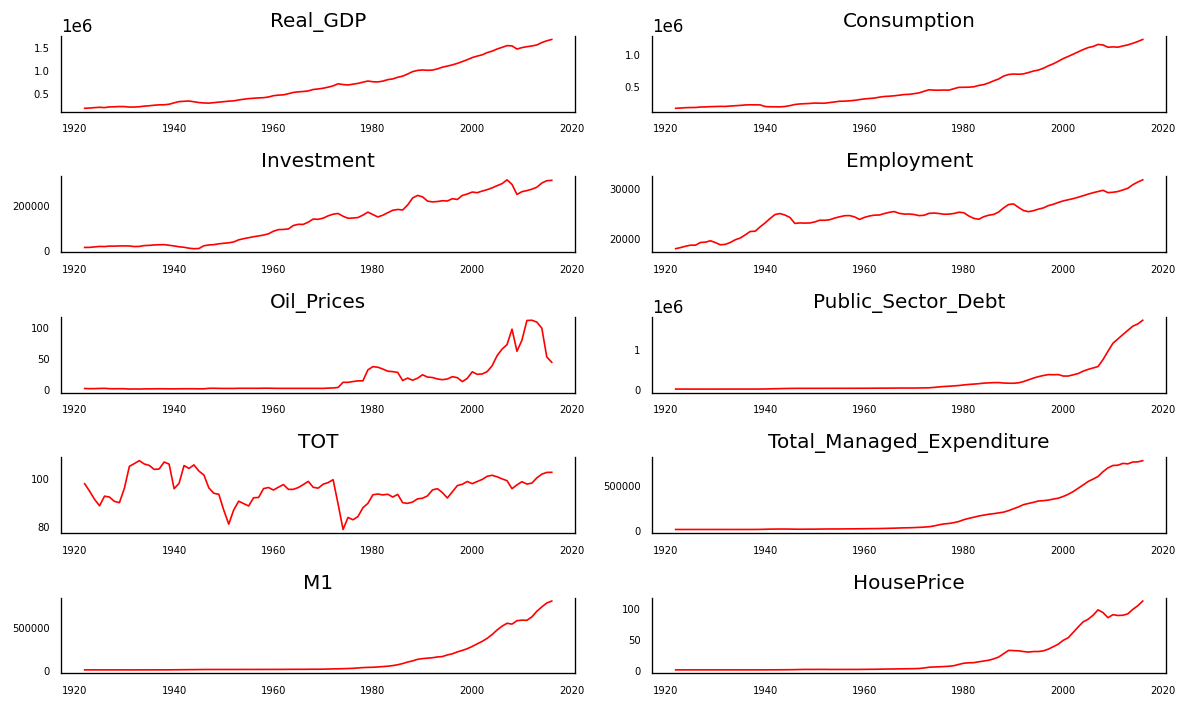

In [82]:


fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df1[df1.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    #Make charts more readable
    ax.set_title(df1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [83]:
# We can see that none of the series is stationary, all of them shows a Trend,
# All the varibles got volatile after the 2ww 

### 2.2 Seasonal decompose

In [84]:
df1_reverse = df1[::-1]
df1=df1_reverse

In [85]:
df1=df1_reverse

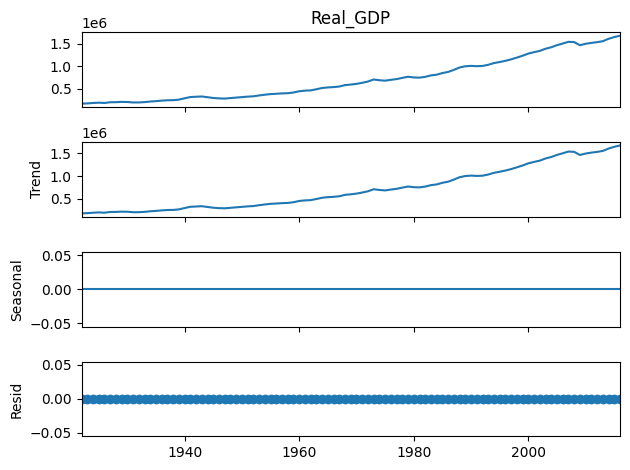

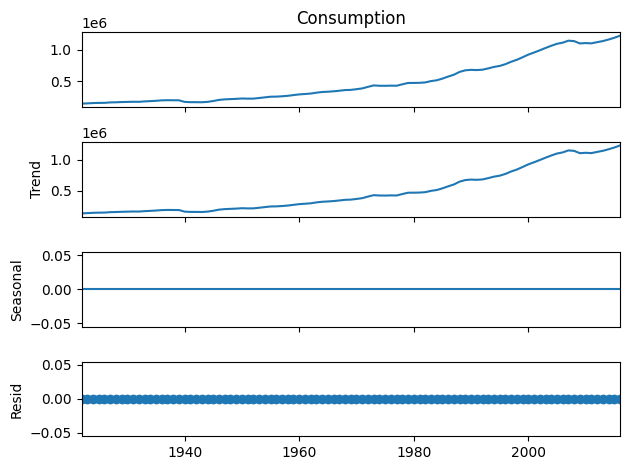

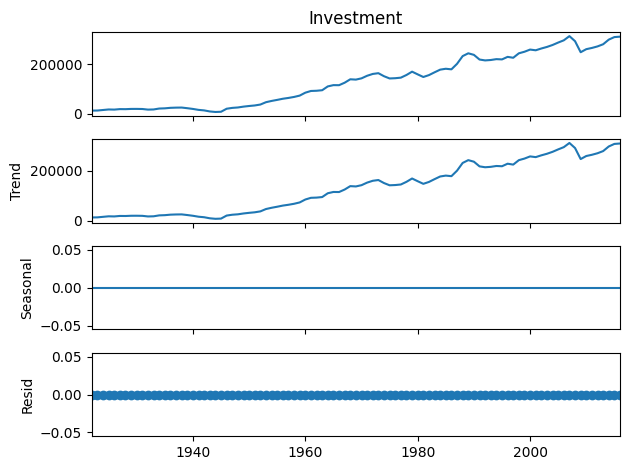

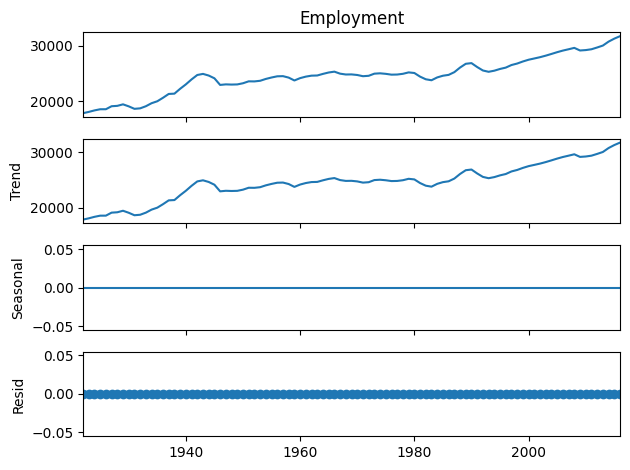

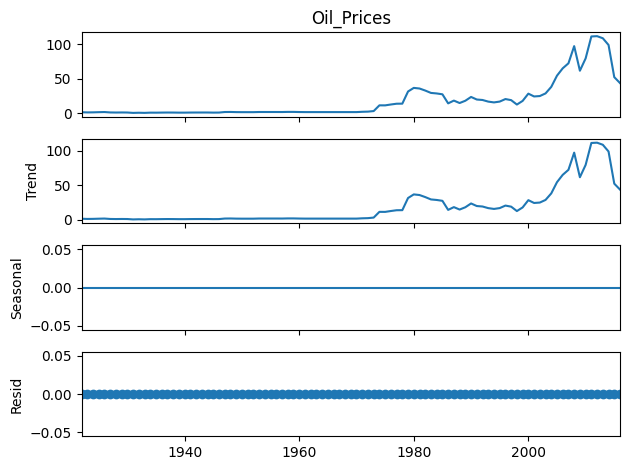

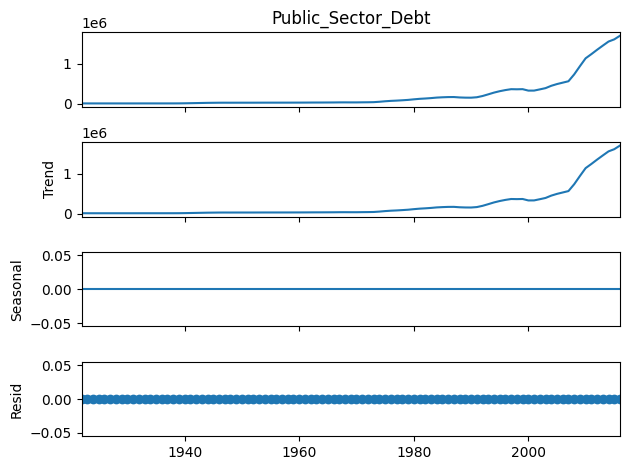

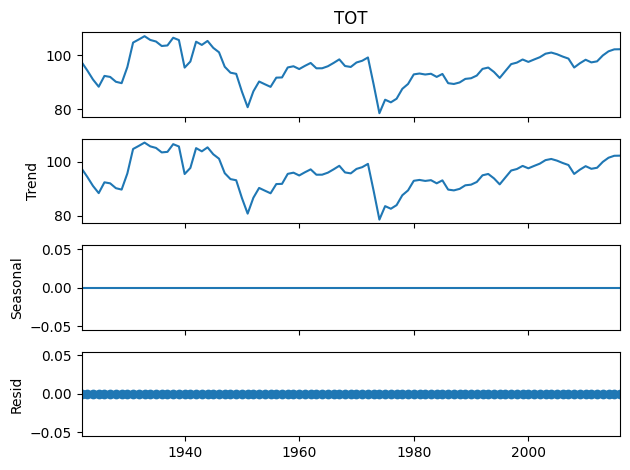

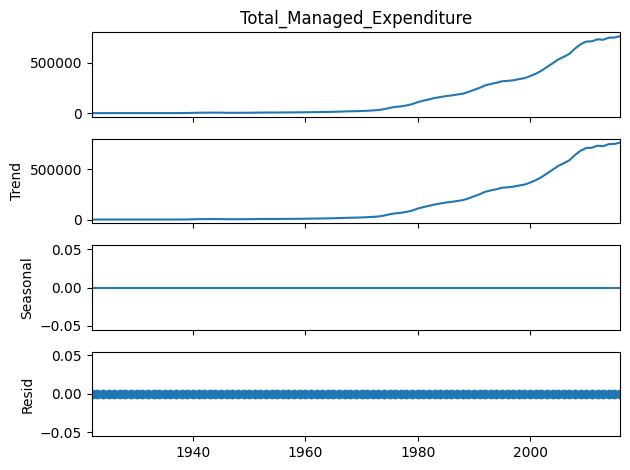

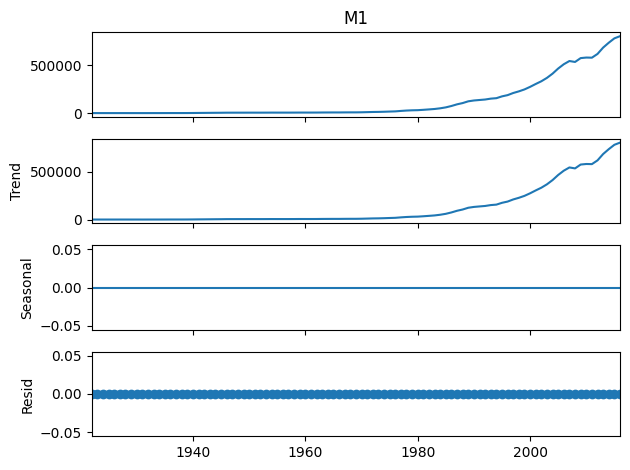

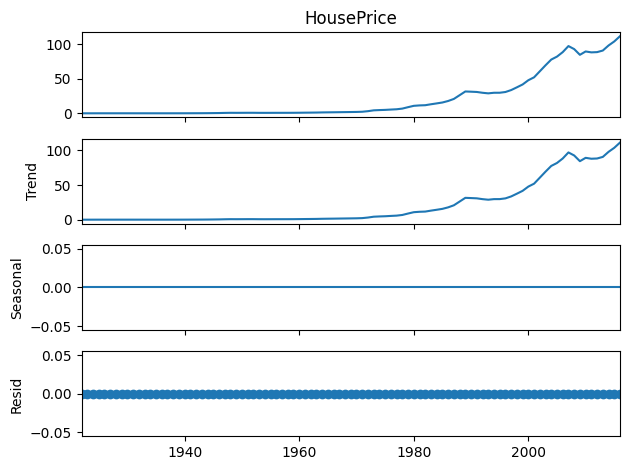

In [86]:
for i, ax in enumerate(axes.flatten()):
    data = seasonal_decompose(df1[df1.columns[i]], model= 'additive',period=1,)
    ax = data.plot()
    
plt.tight_layout();

 2.3 ACF to see if the variables behave as random walks or like other non stationary process 

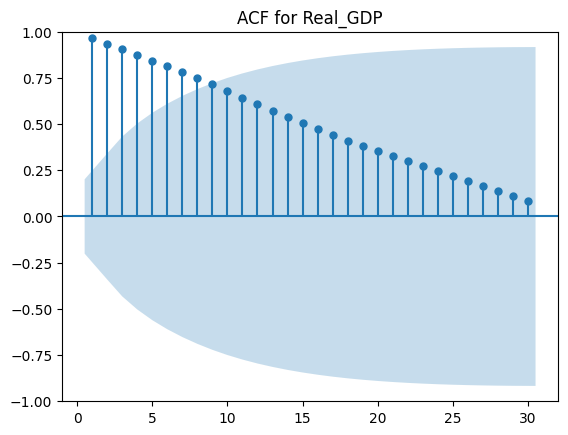

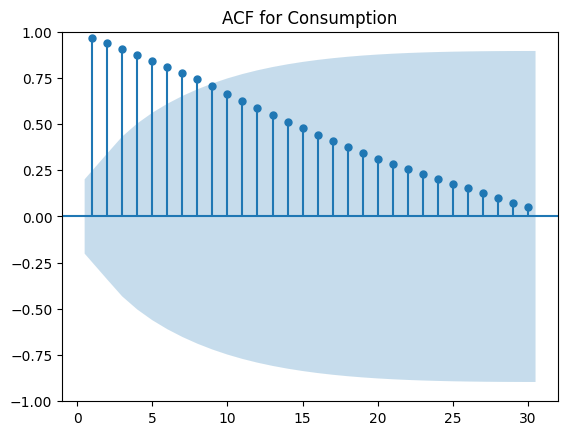

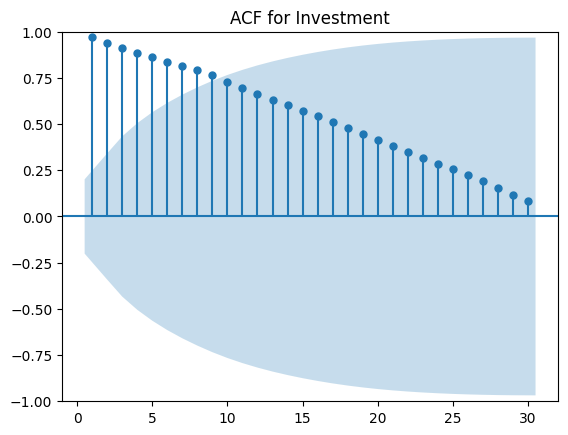

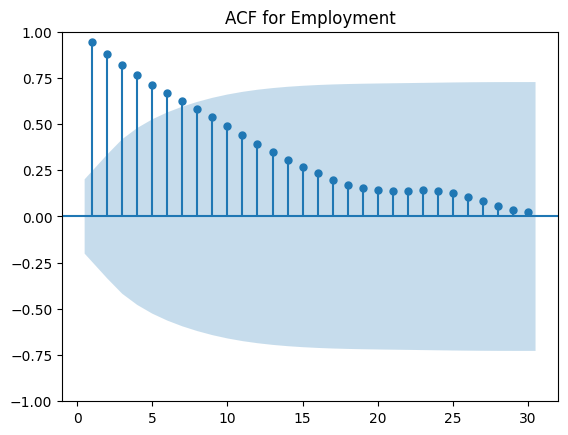

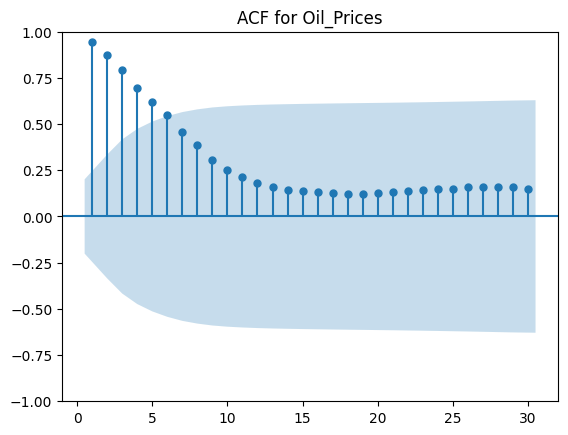

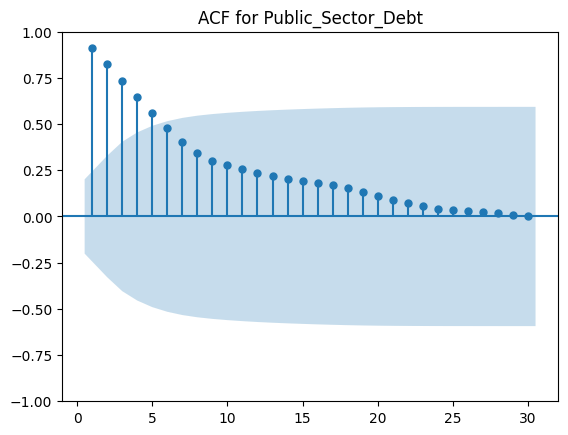

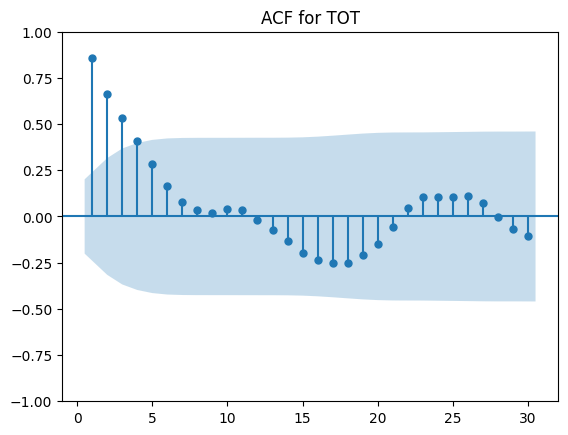

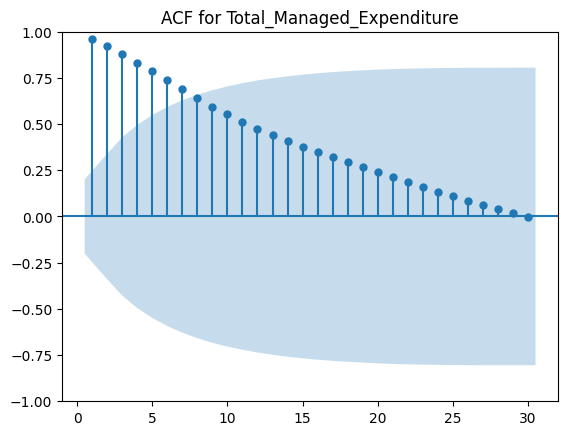

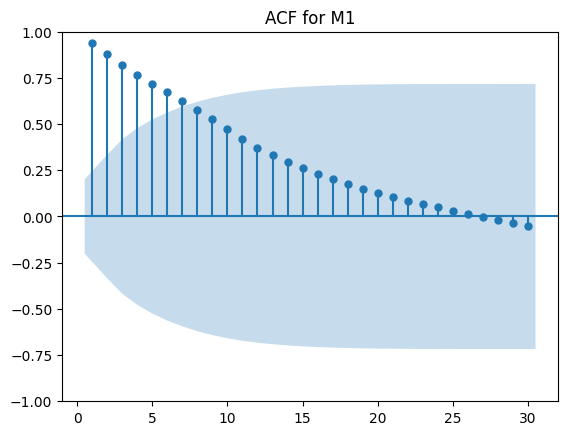

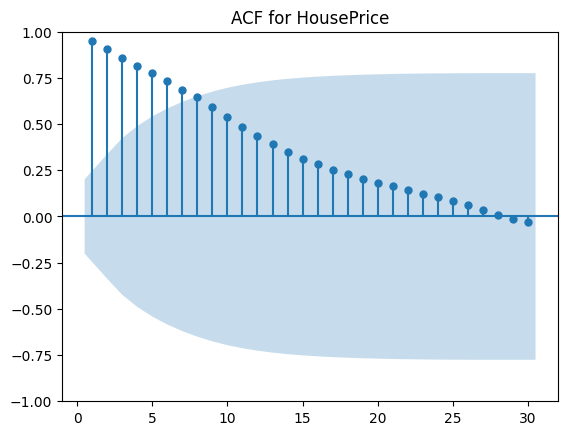

In [87]:
for i in df1:
    sgt.plot_acf(df1[i],lags=30, zero=False)
    plt.title("ACF for %s"%i)
    plt.show()
# Why we use ACF and what can we infer from below 


2.4 PACF to to capture the just only the influece of each period specifically

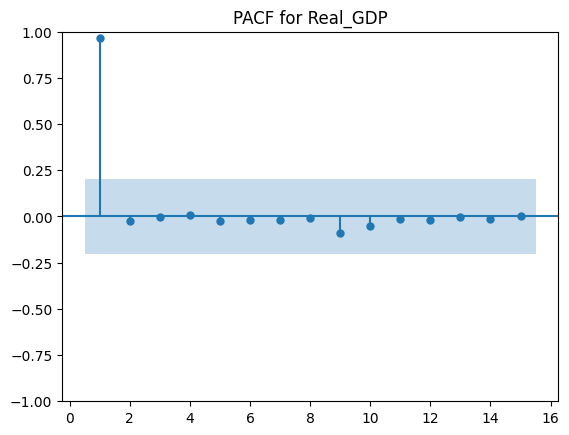

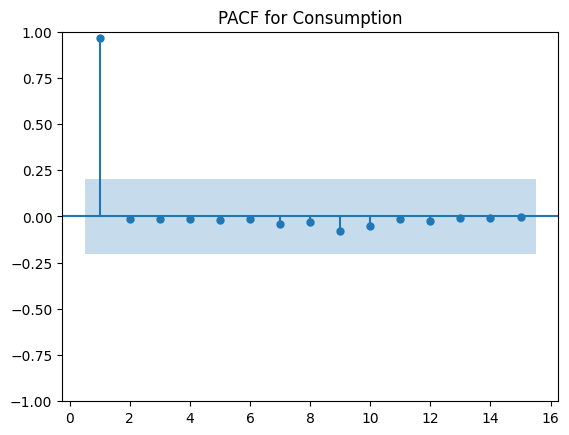

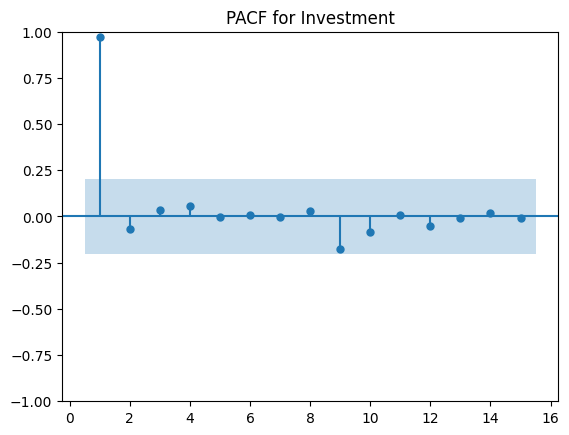

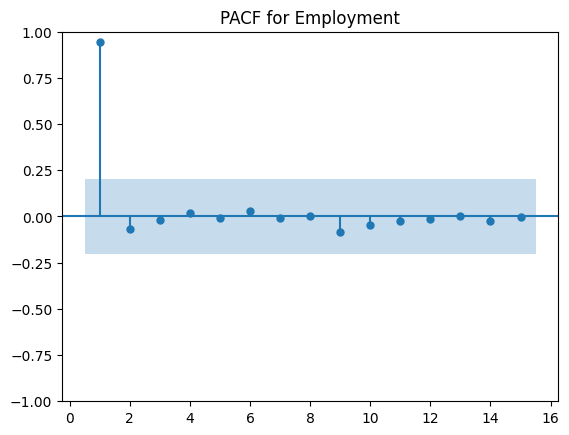

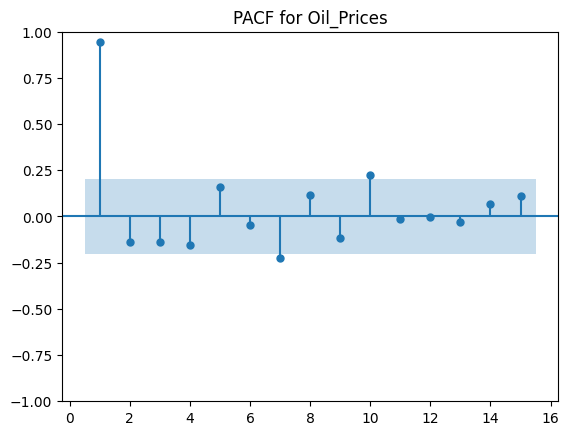

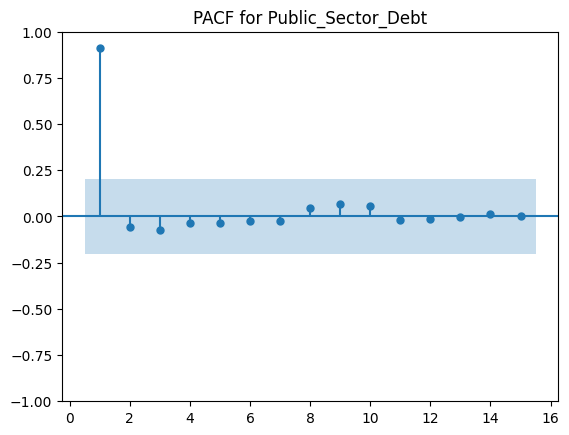

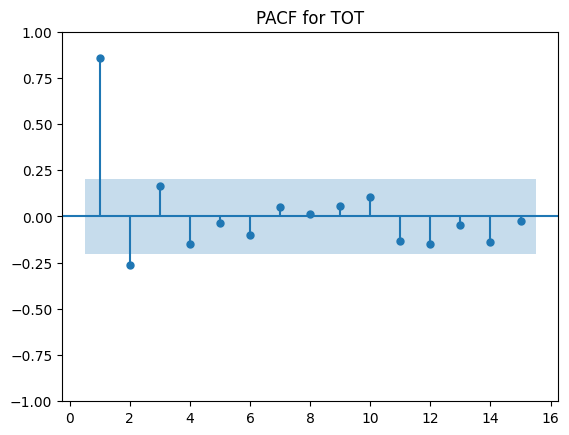

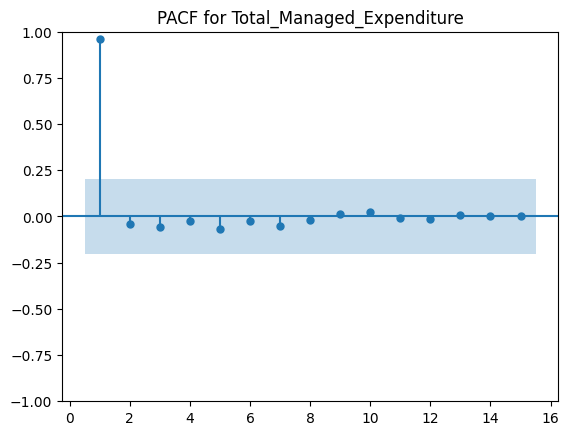

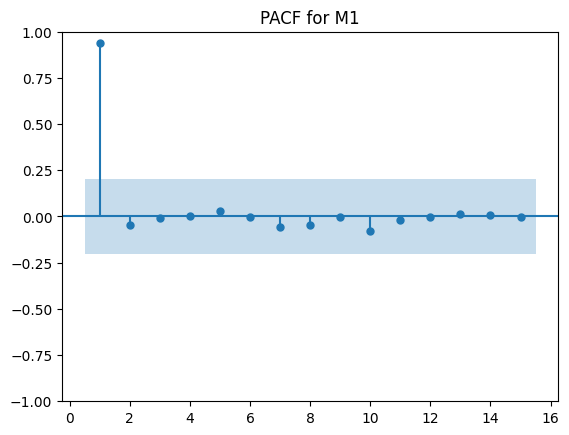

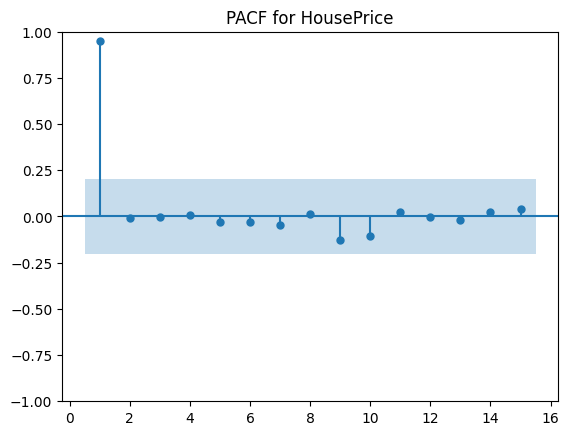

In [88]:
for i in df1:
    sgt.plot_pacf(df1[i],lags=15, zero=False)
    plt.title("PACF for %s"%i)
    plt.show()


# 3 Unit root-stationarity, test and transformations

In [89]:
#3.1 ADF test for unit root
def adf_test(timeseries, name):
    dftest = sts.adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print('\033[1m{:10s}\033[0m'.format(name))
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=4).mean()
    rolstd = timeseries.rolling(window=4).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Real_GDP  
Test Statistic           2.693625
p-value                  0.999087
Lags Used                2.000000
Observations Used       92.000000
Critical Value (1%)     -3.503515
Critical Value (5%)     -2.893508
Critical Value (10%)    -2.583824
dtype: float64


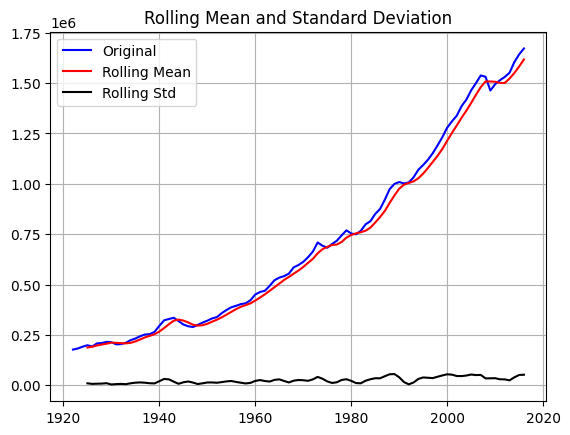

Consumption
Test Statistic           2.051147
p-value                  0.998736
Lags Used                1.000000
Observations Used       93.000000
Critical Value (1%)     -3.502705
Critical Value (5%)     -2.893158
Critical Value (10%)    -2.583637
dtype: float64


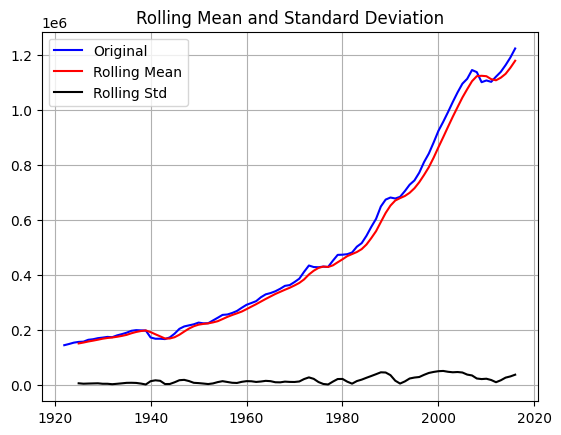

Investment
Test Statistic           0.466425
p-value                  0.983816
Lags Used                2.000000
Observations Used       92.000000
Critical Value (1%)     -3.503515
Critical Value (5%)     -2.893508
Critical Value (10%)    -2.583824
dtype: float64


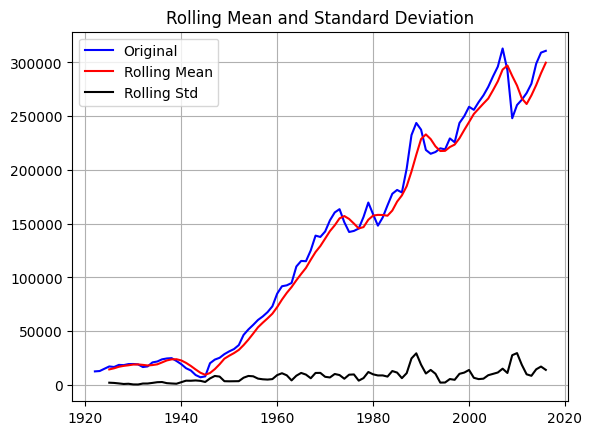

Employment
Test Statistic          -0.724370
p-value                  0.840336
Lags Used                1.000000
Observations Used       93.000000
Critical Value (1%)     -3.502705
Critical Value (5%)     -2.893158
Critical Value (10%)    -2.583637
dtype: float64


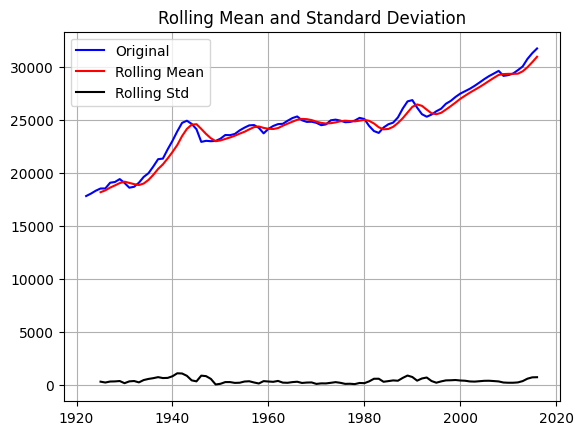

Oil_Prices
Test Statistic          -1.107090
p-value                  0.712236
Lags Used                9.000000
Observations Used       85.000000
Critical Value (1%)     -3.509736
Critical Value (5%)     -2.896195
Critical Value (10%)    -2.585258
dtype: float64


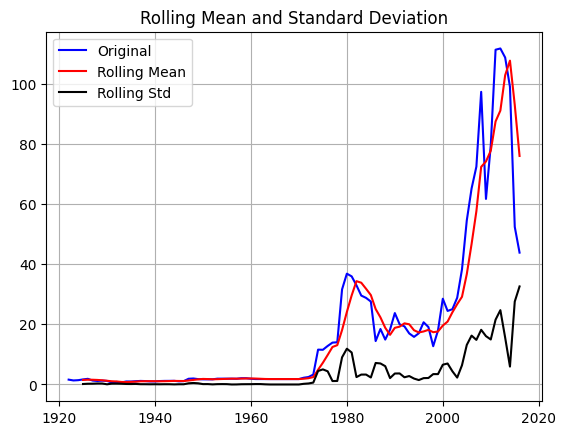

Public_Sector_Debt
Test Statistic           5.491482
p-value                  1.000000
Lags Used               10.000000
Observations Used       84.000000
Critical Value (1%)     -3.510712
Critical Value (5%)     -2.896616
Critical Value (10%)    -2.585482
dtype: float64


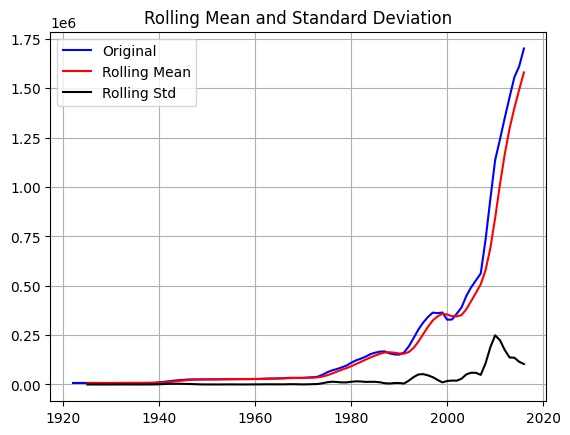

TOT       
Test Statistic          -2.859945
p-value                  0.050208
Lags Used                3.000000
Observations Used       91.000000
Critical Value (1%)     -3.504343
Critical Value (5%)     -2.893866
Critical Value (10%)    -2.584015
dtype: float64


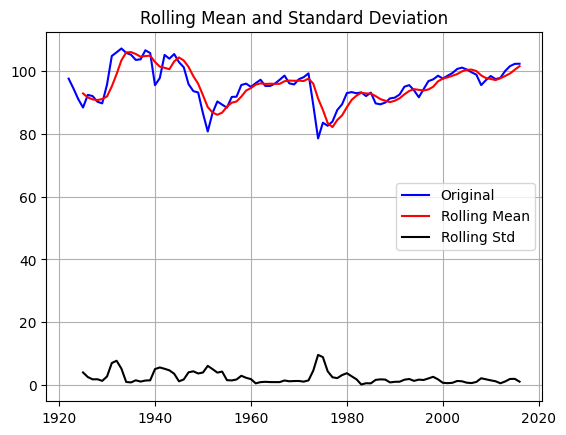

Total_Managed_Expenditure
Test Statistic           1.305582
p-value                  0.996640
Lags Used                3.000000
Observations Used       91.000000
Critical Value (1%)     -3.504343
Critical Value (5%)     -2.893866
Critical Value (10%)    -2.584015
dtype: float64


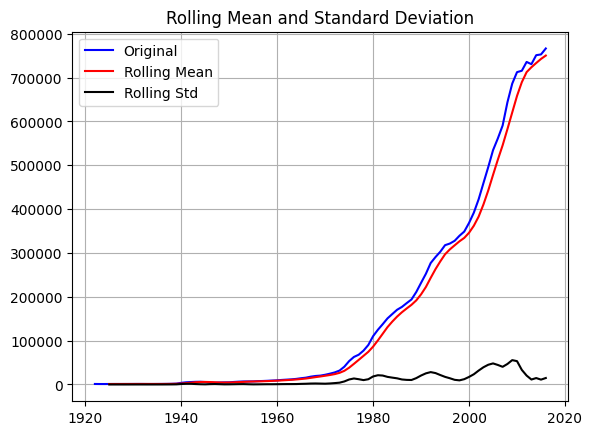

M1        
Test Statistic           0.831598
p-value                  0.992129
Lags Used               12.000000
Observations Used       82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


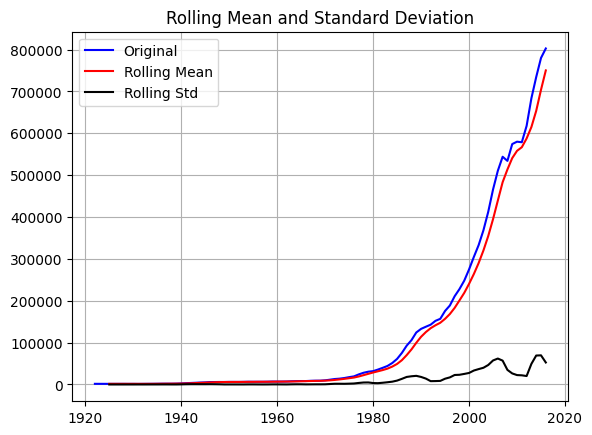

HousePrice
Test Statistic           5.312494
p-value                  1.000000
Lags Used               11.000000
Observations Used       83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


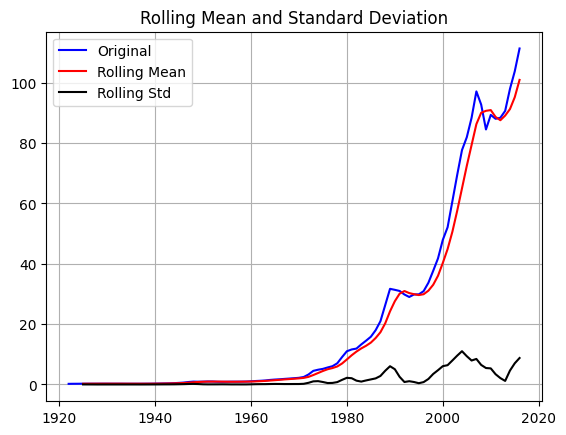

In [90]:
for i in df1:
    adf_test(df1[i], i)

In [91]:
# ADF test results are in line with results  from section 2 

# 4 Test VS Train 

In [92]:
# We split our sample in 2 
size = int(len(df1) * 0.93)
df1_train = df1.iloc[:size]
df1_test = df1.iloc[size:]

In [93]:
df1_train

Real_GDP  Consumption  Investment  Employment  Oil_Prices  \
Year                                                               
1922   176904.0     143929.0     12653.0     17821.0        1.61   
1923   182423.0     148335.0     12990.0     18051.0        1.34   
1924   191378.0     153246.0     15141.0     18322.0        1.43   
1925   198406.0     155908.0     17250.0     18532.0        1.68   
1926   191950.0     156780.0     16743.0     18537.0        1.88   
...         ...          ...         ...         ...         ...   
2005  1464210.0    1095514.0    287077.0     28850.0       54.52   
2006  1500097.0    1113261.0    296121.0     29138.0       65.14   
2007  1538059.0    1145189.0    312995.0     29378.0       72.39   
2008  1531690.0    1137565.0    292575.0     29628.0       97.26   
2009  1463182.0    1100941.0    248099.0     29156.0       61.67   

      Public_Sector_Debt     TOT  Total_Managed_Expenditure        M1  \
Year                                                                    
1922              7790.0   97.57                     1172.0    1563.0   
1923              7734.0   94.44                     1048.0    1537.0   
1924              7676.0   91.05                     1041.0    1519.0   
1925              7642.0   88.37                     1096.0    1491.0   
1926              7648.0   92.39                     1155.0    1476.0   
...                  ...     ...                        ...       ...   
2005            492200.0  100.46                   534479.0  465844.0   
2006            527300.0   99.58                   561242.0  510573.0   
2007            562500.0   98.83                   590694.0  544073.0   
2008            733300.0   95.51                   643692.0  534237.0   
2009            938900.0   97.10                   686259.0  574379.0   

      HousePrice  
Year              
1922        0.21  
1923        0.23  
1924        0.24  
1925        0.26  
1926        0.26  
...          ...  
2005       81.94  
2006       88.38  
2007       97.13  
2008       92.76  
2009       84.52  

[88 rows x 10 columns]

In [94]:
df1_test

Real_GDP  Consumption  Investment  Employment  Oil_Prices  \
Year                                                               
2010  1494588.0    1107273.0    260396.0     29228.0       79.50   
2011  1514583.0    1102262.0    265327.0     29376.0      111.26   
2012  1530435.0    1121061.0    271534.0     29696.0      111.67   
2013  1551553.0    1138546.0    280224.0     30044.0      108.66   
2014  1604169.0    1163136.0    298872.0     30757.0       98.93   
2015  1642802.0    1190789.0    309144.0     31296.0       52.39   
2016  1672084.0    1223627.0    310816.0     31741.0       43.82   

      Public_Sector_Debt     TOT  Total_Managed_Expenditure        M1  \
Year                                                                    
2010           1136900.0   98.40                   712512.0  580083.0   
2011           1240700.0   97.42                   715649.0  578774.0   
2012           1349700.0   97.81                   735765.0  617849.0   
2013           1454000.0  100.00                   730662.0  683952.0   
2014           1556000.0  101.54                   751173.0  734574.0   
2015           1610500.0  102.27                   752904.0  780106.0   
2016           1701800.0  102.31                   766473.0  802754.0   

      HousePrice  
Year              
2010       89.35  
2011       88.05  
2012       88.40  
2013       90.68  
2014       97.96  
2015      103.79  
2016      111.36

## 5 Data Transformation


 5.1 Taking logarithms 

In [95]:

df1_train_log = np.log(df1_train)

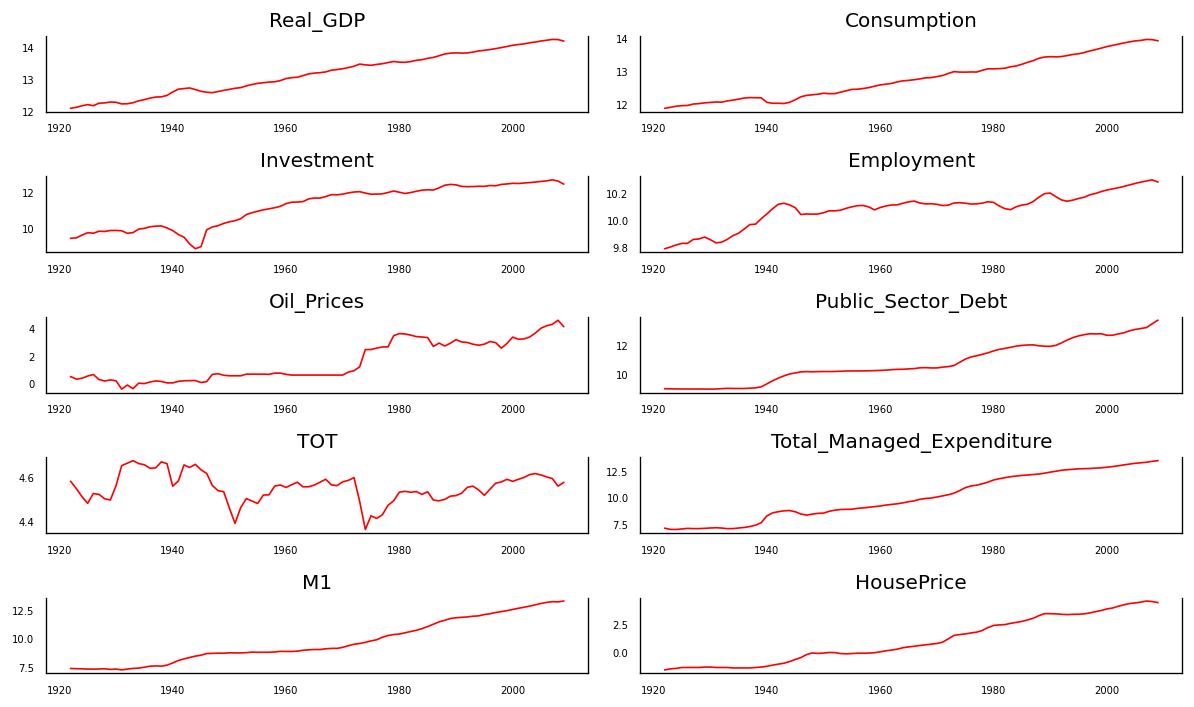

In [96]:
 fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df1_train_log[df1_train_log.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    #Make charts more readable
    ax.set_title(df1_train_log.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

 5.2 Taking first differences 

In [97]:

df1_train_log_diff = (df1_train_log).diff().dropna()

In [98]:
df1_train_log_diff

Real_GDP  Consumption  Investment  Employment  Oil_Prices  \
Year                                                              
1923  0.030721     0.030153    0.026285    0.012824   -0.183565   
1924  0.047922     0.032571    0.153226    0.014901    0.065005   
1925  0.036065     0.017222    0.130406    0.011396    0.161119   
1926 -0.033081     0.005577   -0.029832    0.000270    0.112478   
1927  0.078479     0.042416    0.109687    0.028767   -0.368908   
...        ...          ...         ...         ...         ...   
2005  0.032020     0.029094    0.034701    0.011154    0.353901   
2006  0.024214     0.016070    0.031018    0.009933    0.177971   
2007  0.024991     0.028276    0.055419    0.008203    0.105529   
2008 -0.004150    -0.006680   -0.067466    0.008474    0.295320   
2009 -0.045758    -0.032725   -0.164893   -0.016059   -0.455590   

      Public_Sector_Debt       TOT  Total_Managed_Expenditure        M1  \
Year                                                                      
1923           -0.007215 -0.032605                  -0.111828 -0.016775   
1924           -0.007528 -0.036556                  -0.006702 -0.011780   
1925           -0.004439 -0.029876                   0.051485 -0.018605   
1926            0.000785  0.044486                   0.052433 -0.010111   
1927           -0.001570 -0.004121                  -0.020114  0.012121   
...                  ...       ...                        ...       ...   
2005            0.092531 -0.006153                   0.074948  0.121472   
2006            0.068885 -0.008798                   0.048860  0.091683   
2007            0.064621 -0.007560                   0.051146  0.063550   
2008            0.265164 -0.034170                   0.085922 -0.018244   
2009            0.247154  0.016510                   0.064035  0.072450   

      HousePrice  
Year              
1923    0.090972  
1924    0.042560  
1925    0.080043  
1926    0.000000  
1927    0.000000  
...          ...  
2005    0.053389  
2006    0.075658  
2007    0.094405  
2008   -0.046035  
2009   -0.093027  

[87 rows x 10 columns]

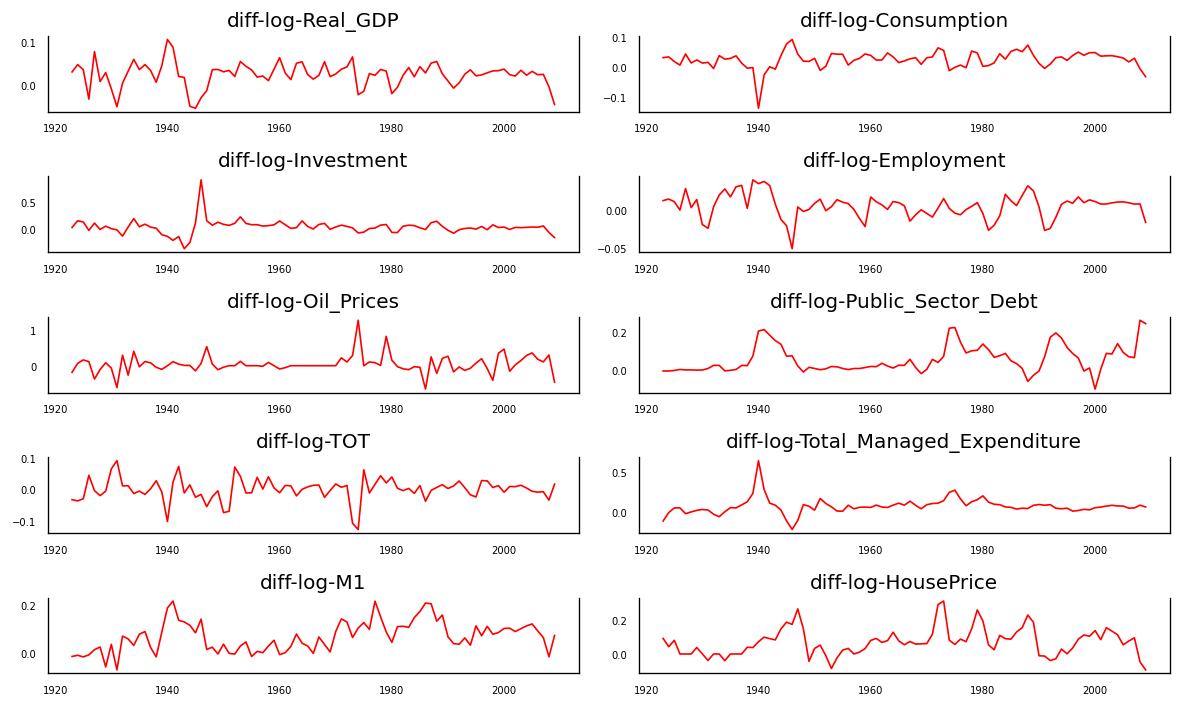

In [99]:
 fig, axes = plt.subplots(nrows=int(len(df1_train_log_diff.columns)/2), ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df1_train_log_diff[df1_train_log_diff.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    #Make charts more readable
    ax.set_title("diff-log-" + df1_train_log_diff.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

5.3 ADF test  

Real_GDP  
Test Statistic          -5.350074
p-value                  0.000004
Lags Used                1.000000
Observations Used       85.000000
Critical Value (1%)     -3.509736
Critical Value (5%)     -2.896195
Critical Value (10%)    -2.585258
dtype: float64


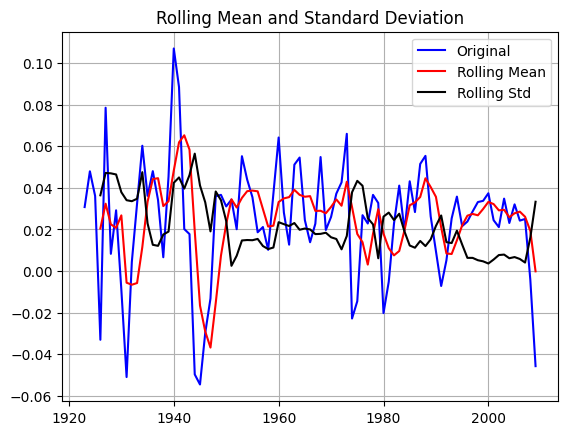

Consumption
Test Statistic          -5.294196
p-value                  0.000006
Lags Used                0.000000
Observations Used       86.000000
Critical Value (1%)     -3.508783
Critical Value (5%)     -2.895784
Critical Value (10%)    -2.585038
dtype: float64


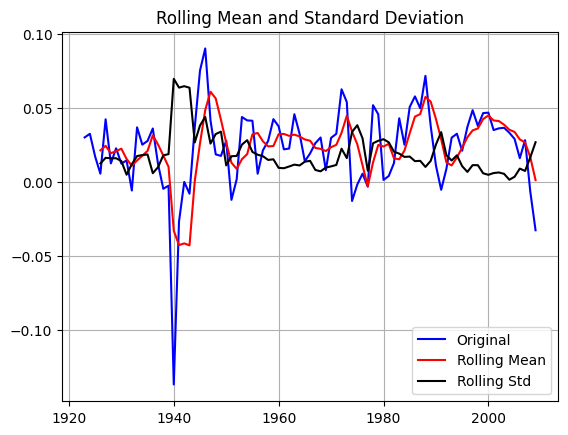

Investment
Test Statistic         -5.955325e+00
p-value                 2.099916e-07
Lags Used               1.000000e+00
Observations Used       8.500000e+01
Critical Value (1%)    -3.509736e+00
Critical Value (5%)    -2.896195e+00
Critical Value (10%)   -2.585258e+00
dtype: float64


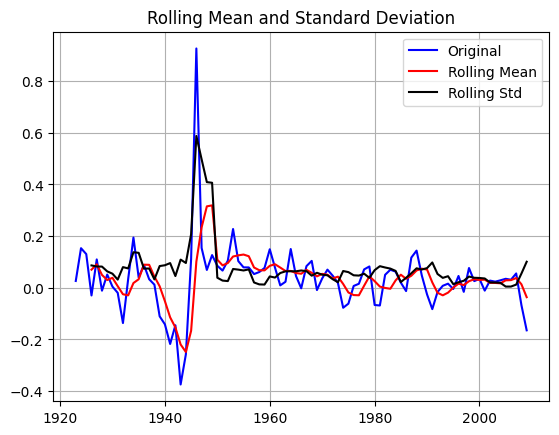

Employment
Test Statistic          -4.956223
p-value                  0.000027
Lags Used                0.000000
Observations Used       86.000000
Critical Value (1%)     -3.508783
Critical Value (5%)     -2.895784
Critical Value (10%)    -2.585038
dtype: float64


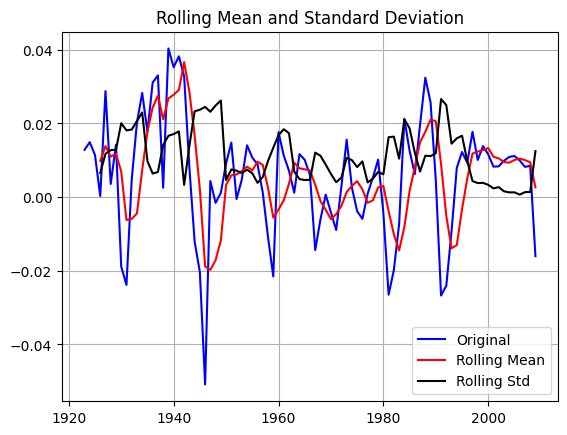

Oil_Prices
Test Statistic         -8.998631e+00
p-value                 6.589403e-15
Lags Used               0.000000e+00
Observations Used       8.600000e+01
Critical Value (1%)    -3.508783e+00
Critical Value (5%)    -2.895784e+00
Critical Value (10%)   -2.585038e+00
dtype: float64


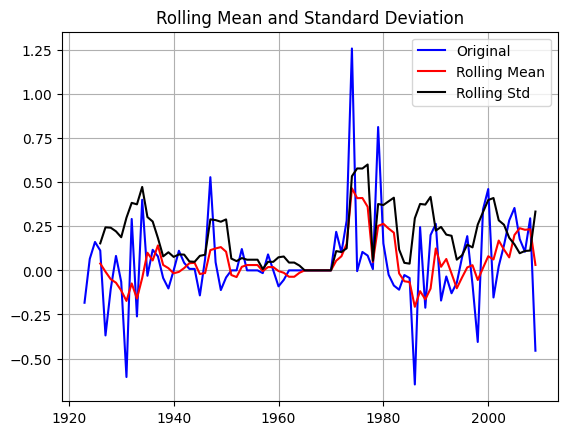

Public_Sector_Debt
Test Statistic          -3.542169
p-value                  0.006968
Lags Used                1.000000
Observations Used       85.000000
Critical Value (1%)     -3.509736
Critical Value (5%)     -2.896195
Critical Value (10%)    -2.585258
dtype: float64


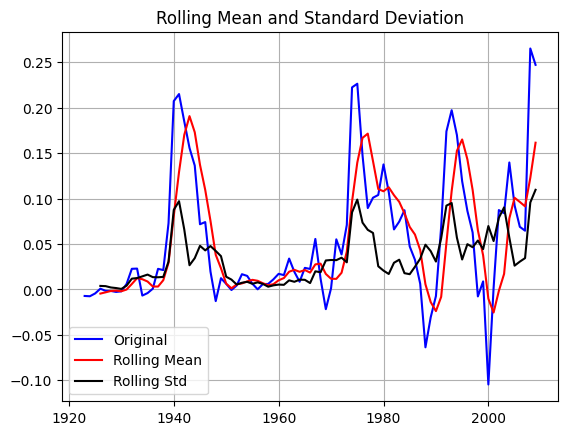

TOT       
Test Statistic         -7.650672e+00
p-value                 1.792873e-11
Lags Used               1.000000e+00
Observations Used       8.500000e+01
Critical Value (1%)    -3.509736e+00
Critical Value (5%)    -2.896195e+00
Critical Value (10%)   -2.585258e+00
dtype: float64


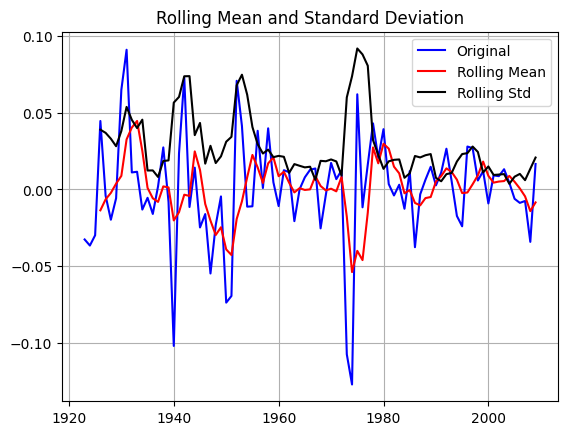

Total_Managed_Expenditure
Test Statistic          -4.738610
p-value                  0.000071
Lags Used                5.000000
Observations Used       81.000000
Critical Value (1%)     -3.513790
Critical Value (5%)     -2.897943
Critical Value (10%)    -2.586191
dtype: float64


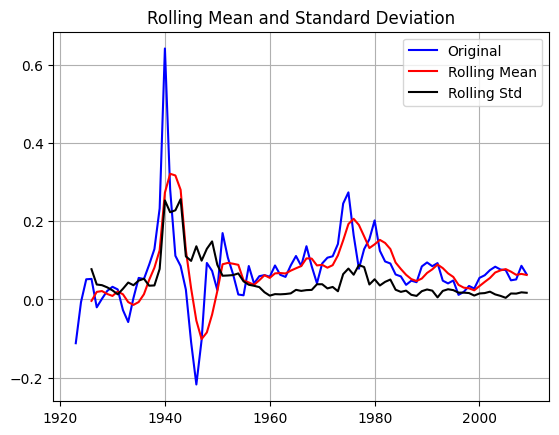

M1        
Test Statistic          -4.267299
p-value                  0.000506
Lags Used                0.000000
Observations Used       86.000000
Critical Value (1%)     -3.508783
Critical Value (5%)     -2.895784
Critical Value (10%)    -2.585038
dtype: float64


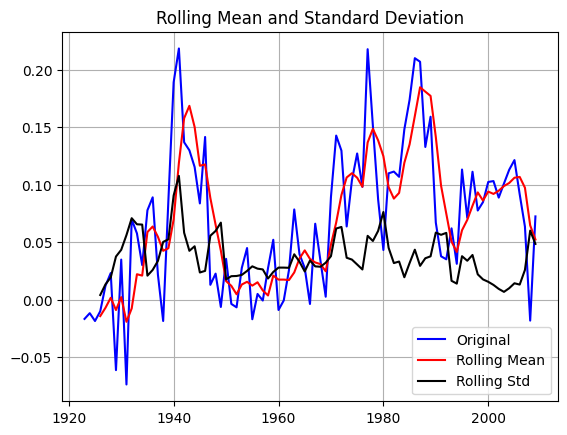

HousePrice
Test Statistic          -3.540713
p-value                  0.007001
Lags Used                3.000000
Observations Used       83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


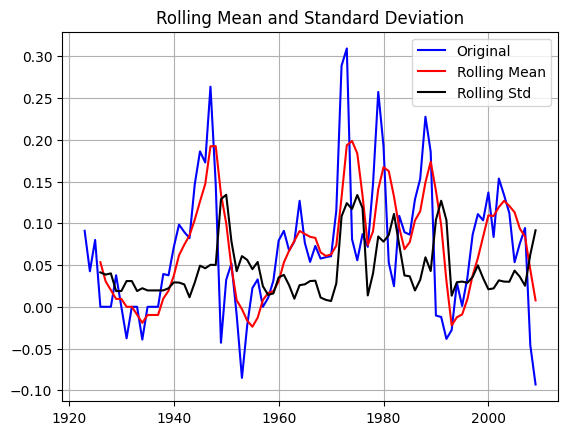

In [100]:


for i in df1_train_log_diff:
    adf_test(df1_train_log_diff[i], i)

In [101]:
# all Variables are now stationary, 

 5.4 ACF functions

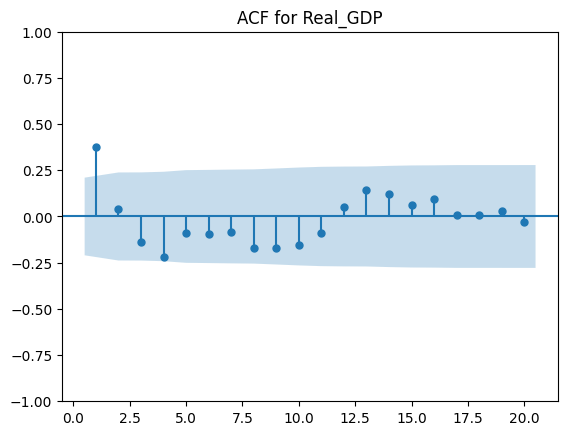

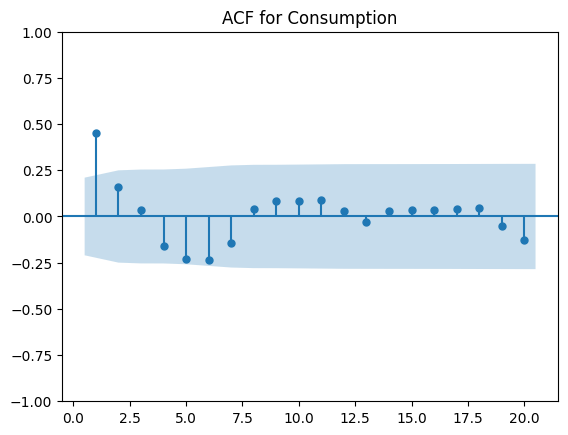

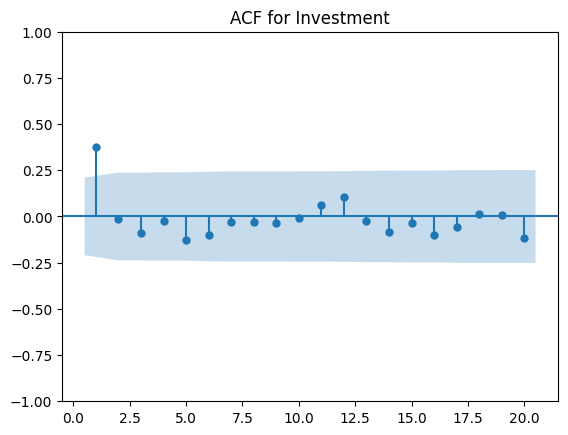

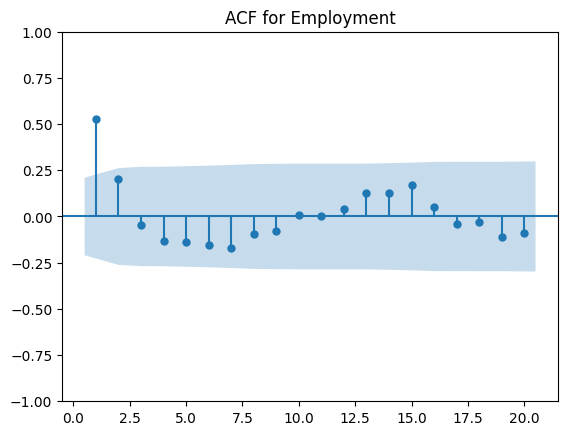

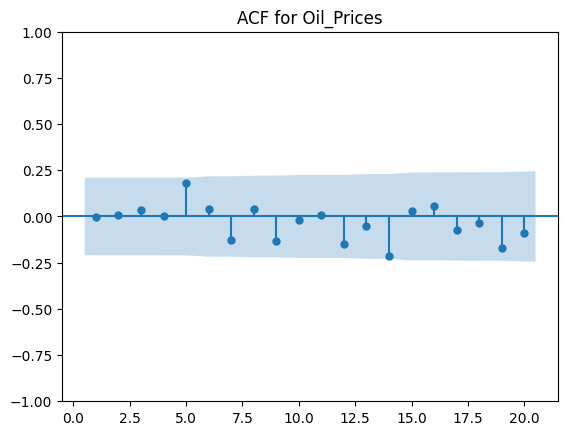

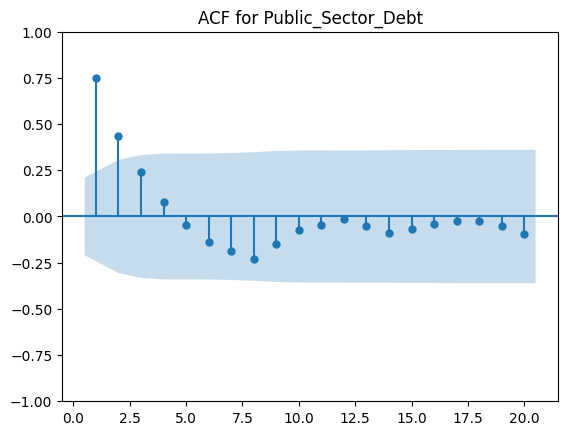

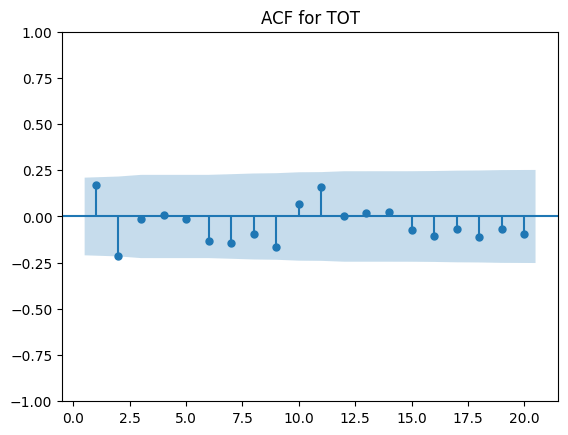

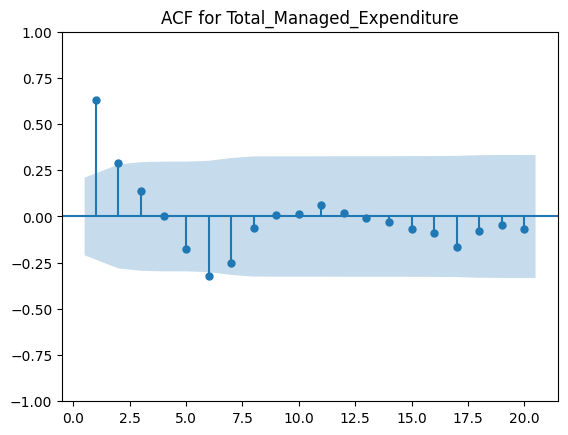

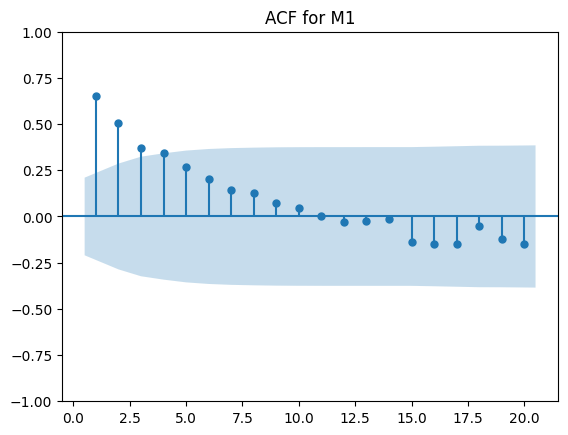

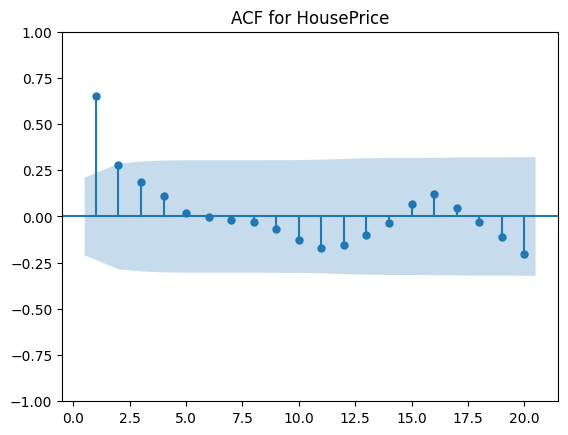

In [102]:

for i in df1_train_log_diff:
    sgt.plot_acf(df1_train_log_diff[i], lags = 20, zero=False)
    plt.title('ACF for %s' % i) 
    plt.show()

 5.5 PACF

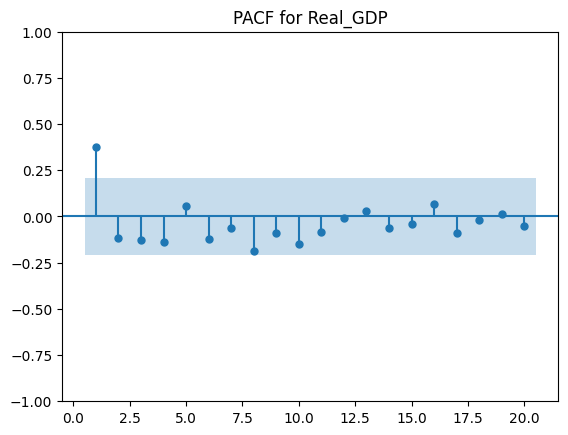

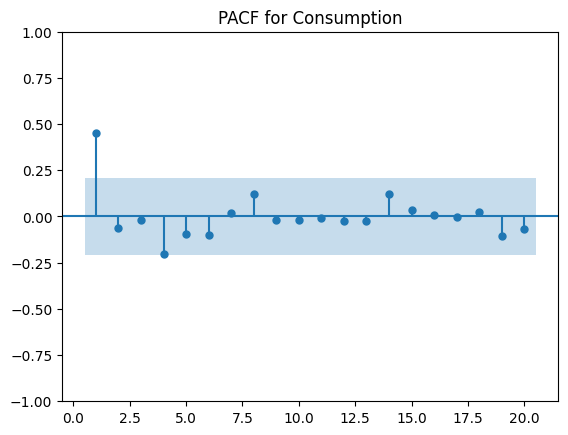

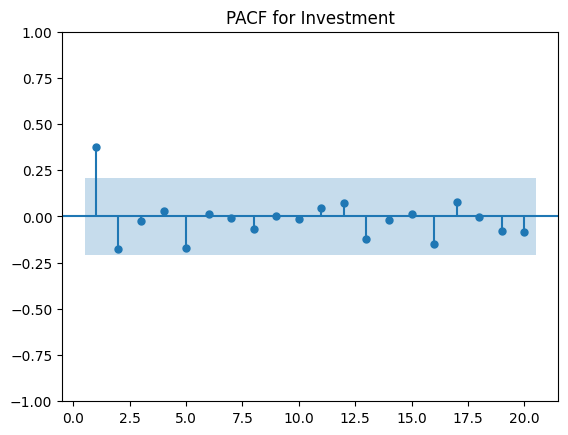

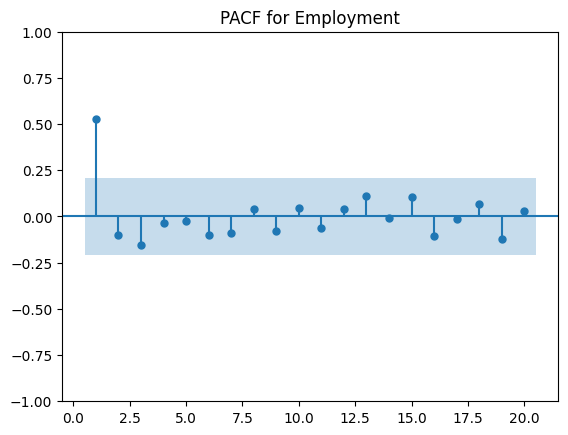

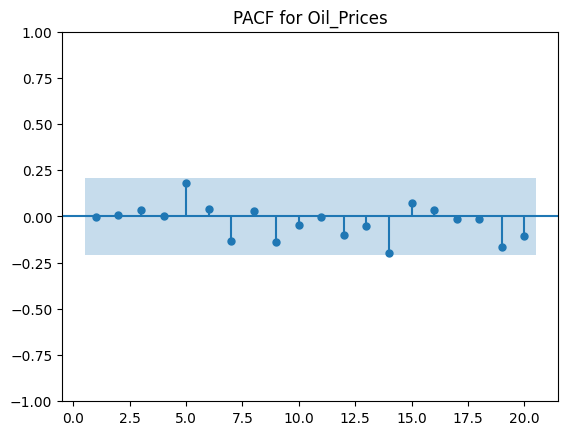

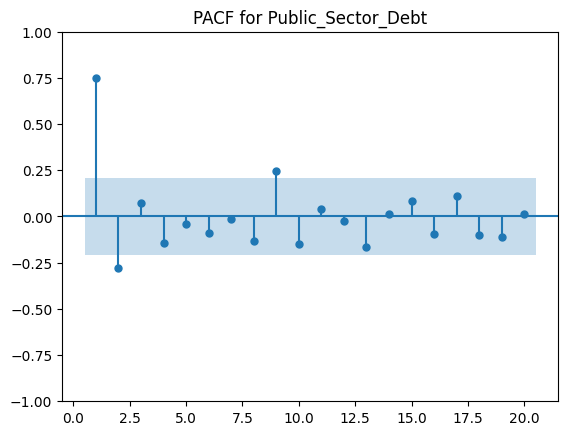

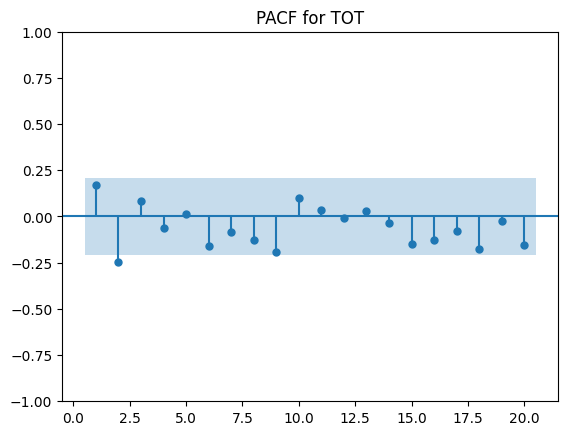

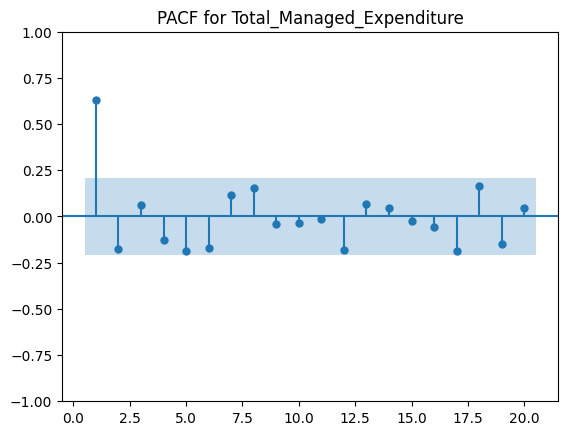

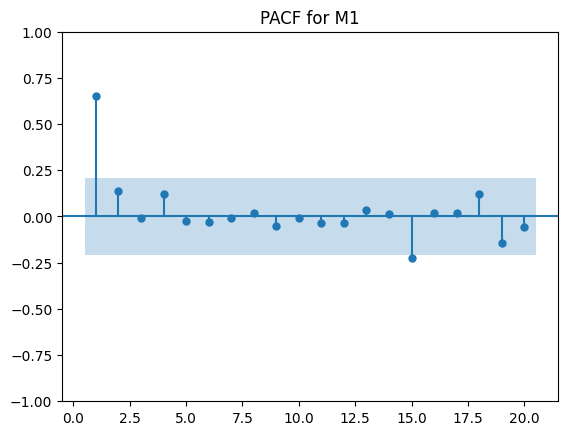

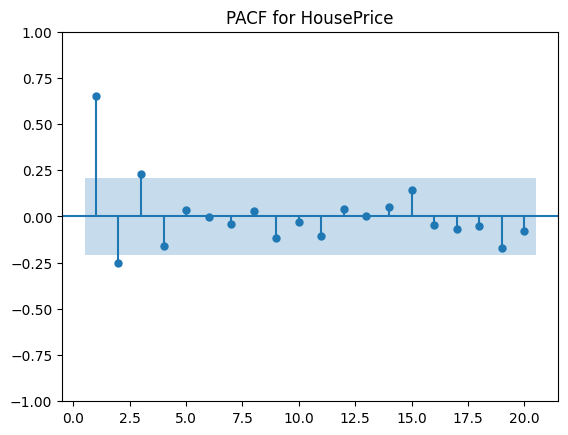

In [103]:

for i in df1_train_log_diff:
    sgt.plot_pacf(df1_train_log_diff[i], lags = 20, zero=False)
    plt.title('PACF for %s' % i) 
    plt.show()

 5.6 Granger Causality test to check casula relations between the set of variables we are going to use 

In [104]:

lag=int(((int(len(df1_train.index)))/3)/int(len(df1_train.columns)))
lag

2

In [105]:
maxlag=lag

test = 'ssr_chi2test'


def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables) #creating a df with 0 to store granger results
    for c in df.columns:
        for r in df.index:
            test_result = sts.grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)] #This line extracts the p-values from the Granger causality test results. It iterates over each lag from 1 to maxlag (assuming maxlag is defined somewhere), retrieves the p-value from the test results, and rounds it to 4 decimal places.
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [106]:
grangers_causation_matrix(df1_train_log_diff, variables = df1_train_log_diff.columns) 

Real_GDP_x  Consumption_x  Investment_x  \
Real_GDP_y                       1.0000         0.4509        0.2788   
Consumption_y                    0.1486         1.0000        0.2322   
Investment_y                     0.0028         0.0006        1.0000   
Employment_y                     0.0013         0.6862        0.0128   
Oil_Prices_y                     0.1347         0.0195        0.0243   
Public_Sector_Debt_y             0.3822         0.0976        0.0932   
TOT_y                            0.2818         0.0003        0.0974   
Total_Managed_Expenditure_y      0.0909         0.0848        0.0121   
M1_y                             0.5571         0.0540        0.0055   
HousePrice_y                     0.7398         0.0648        0.0106   

                             Employment_x  Oil_Prices_x  Public_Sector_Debt_x  \
Real_GDP_y                         0.3392        0.0551                0.1472   
Consumption_y                      0.0081        0.4725                0.1984   
Investment_y                       0.0160        0.1019                0.0156   
Employment_y                       1.0000        0.0535                0.3774   
Oil_Prices_y                       0.6106        1.0000                0.9050   
Public_Sector_Debt_y               0.4724        0.1372                1.0000   
TOT_y                              0.1581        0.0497                0.5530   
Total_Managed_Expenditure_y        0.0028        0.1180                0.1103   
M1_y                               0.3682        0.5122                0.0153   
HousePrice_y                       0.1640        0.2674                0.3587   

                              TOT_x  Total_Managed_Expenditure_x    M1_x  \
Real_GDP_y                   0.1059                       0.2438  0.0095   
Consumption_y                0.1006                       0.1066  0.0233   
Investment_y                 0.7609                       0.0004  0.5312   
Employment_y                 0.8188                       0.8923  0.0098   
Oil_Prices_y                 0.0519                       0.9096  0.0169   
Public_Sector_Debt_y         0.1683                       0.0050  0.5390   
TOT_y                        1.0000                       0.0622  0.7954   
Total_Managed_Expenditure_y  0.0634                       1.0000  0.4485   
M1_y                         0.3050                       0.0048  1.0000   
HousePrice_y                 0.2318                       0.2968  0.0000   

                             HousePrice_x  
Real_GDP_y                         0.1456  
Consumption_y                      0.8151  
Investment_y                       0.6816  
Employment_y                       0.0245  
Oil_Prices_y                       0.0000  
Public_Sector_Debt_y               0.3067  
TOT_y                              0.0434  
Total_Managed_Expenditure_y        0.1794  
M1_y                               0.7776  
HousePrice_y                       1.0000

###  6 VAR model

6.1  #Determine number of lags for our AR 

In [107]:

var_model = VAR(endog=df1_train_log_diff)
res_var = var_model.select_order(maxlags=3, trend='ct')
res_var.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [108]:
# Based on AIC Criteria we swelect 1 lag fo our model 

6.2 Fit the model 

In [109]:
var_model_fit = var_model.fit(maxlags=1, ic='aic')
var_model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 18, Mar, 2024
Time:                     09:44:09
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -60.2321
Nobs:                     86.0000    HQIC:                  -62.1079
Log likelihood:           1614.68    FPE:                3.04994e-28
AIC:                     -63.3714    Det(Omega_mle):     9.15289e-29
--------------------------------------------------------------------
Results for equation Real_GDP
                                  coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------
const                                0.017423         0.007241            2.406           0.016
L1.Real_GDP                          0.170356         0.168249            1.013           0.3

6.3 Check for serial correlation of residuals

In [110]:

dw_check_var = durbin_watson(var_model_fit.resid)

for col, val in zip(df1_train_log_diff.columns, dw_check_var):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
Real_GDP --> 1.88
----------------------------
Durbin-Watson statistic for:
Consumption --> 2.04
----------------------------
Durbin-Watson statistic for:
Investment --> 2.02
----------------------------
Durbin-Watson statistic for:
Employment --> 2.08
----------------------------
Durbin-Watson statistic for:
Oil_Prices --> 1.87
----------------------------
Durbin-Watson statistic for:
Public_Sector_Debt --> 1.72
----------------------------
Durbin-Watson statistic for:
TOT --> 1.89
----------------------------
Durbin-Watson statistic for:
Total_Managed_Expenditure --> 1.84
----------------------------
Durbin-Watson statistic for:
M1 --> 2.23
----------------------------
Durbin-Watson statistic for:
HousePrice --> 1.81
----------------------------


In [111]:
 #Store VAR model lags in a variable
lag_order = var_model_fit.k_ar
print(lag_order)

1


In [112]:
#Input data for forecasting
pred_input = df1_train_log_diff.values[-lag_order:]
pred_input

array([[-0.04575818, -0.03272474, -0.16489318, -0.01605914, -0.45559022,
         0.24715408,  0.01651042,  0.06403476,  0.0724499 , -0.09302732]])

6.4 Forecasting 

In [113]:

var_pred = var_model_fit.forecast(y=pred_input, steps=len(df1_test))

df_var_pred = pd.DataFrame(var_pred, index = df1_test.index, columns = df1_train_log_diff.columns + '_1d')

df_var_pred

Real_GDP_1d  Consumption_1d  Investment_1d  Employment_1d  \
Year                                                              
2010     0.001944        0.014515       0.005171      -0.009392   
2011     0.009931        0.042848       0.034819       0.001942   
2012     0.006336        0.043339       0.072724       0.003348   
2013     0.007977        0.036673       0.096270       0.002258   
2014     0.013521        0.031077       0.092186       0.002372   
2015     0.018341        0.027577       0.075037       0.003202   
2016     0.021349        0.025371       0.059150       0.003938   

      Oil_Prices_1d  Public_Sector_Debt_1d    TOT_1d  \
Year                                                   
2010      -0.234827               0.183685  0.017334   
2011      -0.103376               0.117577  0.005086   
2012       0.013087               0.074818 -0.009305   
2013       0.051639               0.052738 -0.009819   
2014       0.057800               0.043198 -0.005840   
2015       0.051903               0.040946 -0.002342   
2016       0.043373               0.042653 -0.000361   

      Total_Managed_Expenditure_1d     M1_1d  HousePrice_1d  
Year                                                         
2010                     -0.038911  0.109730      -0.025287  
2011                     -0.078177  0.086982       0.050379  
2012                     -0.053193  0.071091       0.077989  
2013                     -0.012132  0.062342       0.080248  
2014                      0.020636  0.057487       0.075587  
2015                      0.042513  0.055352       0.069756  
2016                      0.056344  0.055862       0.064677

In [114]:
# in order to compare better our results we ned to revert the transformations we have done previously
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = np.log(df_train[col].iloc[-1]) + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [115]:
df_var_pred_inv = invert_transformation(df1_train, df_var_pred)
df_var_pred_inv = df_var_pred_inv.filter(regex='_forecast$',axis=1)
df_var_pred_inv = np.exp(df_var_pred_inv) 

round(df_var_pred_inv.head(), 3)

Real_GDP_forecast  Consumption_forecast  Investment_forecast  \
Year                                                                 
2010        1466029.378           1117037.543           249385.291   
2011        1480660.823           1165940.122           258221.601   
2012        1490072.519           1217581.620           277700.162   
2013        1502007.082           1263063.084           305763.536   
2014        1522453.286           1302931.816           335290.596   

      Employment_forecast  Oil_Prices_forecast  Public_Sector_Debt_forecast  \
Year                                                                          
2010            28883.455               48.763                  1128217.554   
2011            28939.598               43.974                  1268983.443   
2012            29036.654               44.553                  1367568.351   
2013            29102.295               46.914                  1441626.431   
2014            29171.408               49.706                  1505266.925   

      TOT_forecast  Total_Managed_Expenditure_forecast  M1_forecast  \
Year                                                                  
2010        98.798                          660069.078   640993.542   
2011        99.302                          610432.092   699245.317   
2012        98.382                          578809.702   750764.795   
2013        97.421                          571829.759   799058.641   
2014        96.853                          583752.358   846339.727   

      HousePrice_forecast  
Year                       
2010               82.410  
2011               86.668  
2012               93.697  
2013              101.526  
2014              109.498

6.5 Evaluate the predictions
 

In [116]:
 var_mape = metrics.mean_absolute_percentage_error(df1_test, df_var_pred_inv)

var_model_accuracy = 1 - var_mape
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(var_model_accuracy, 3))

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
0.883


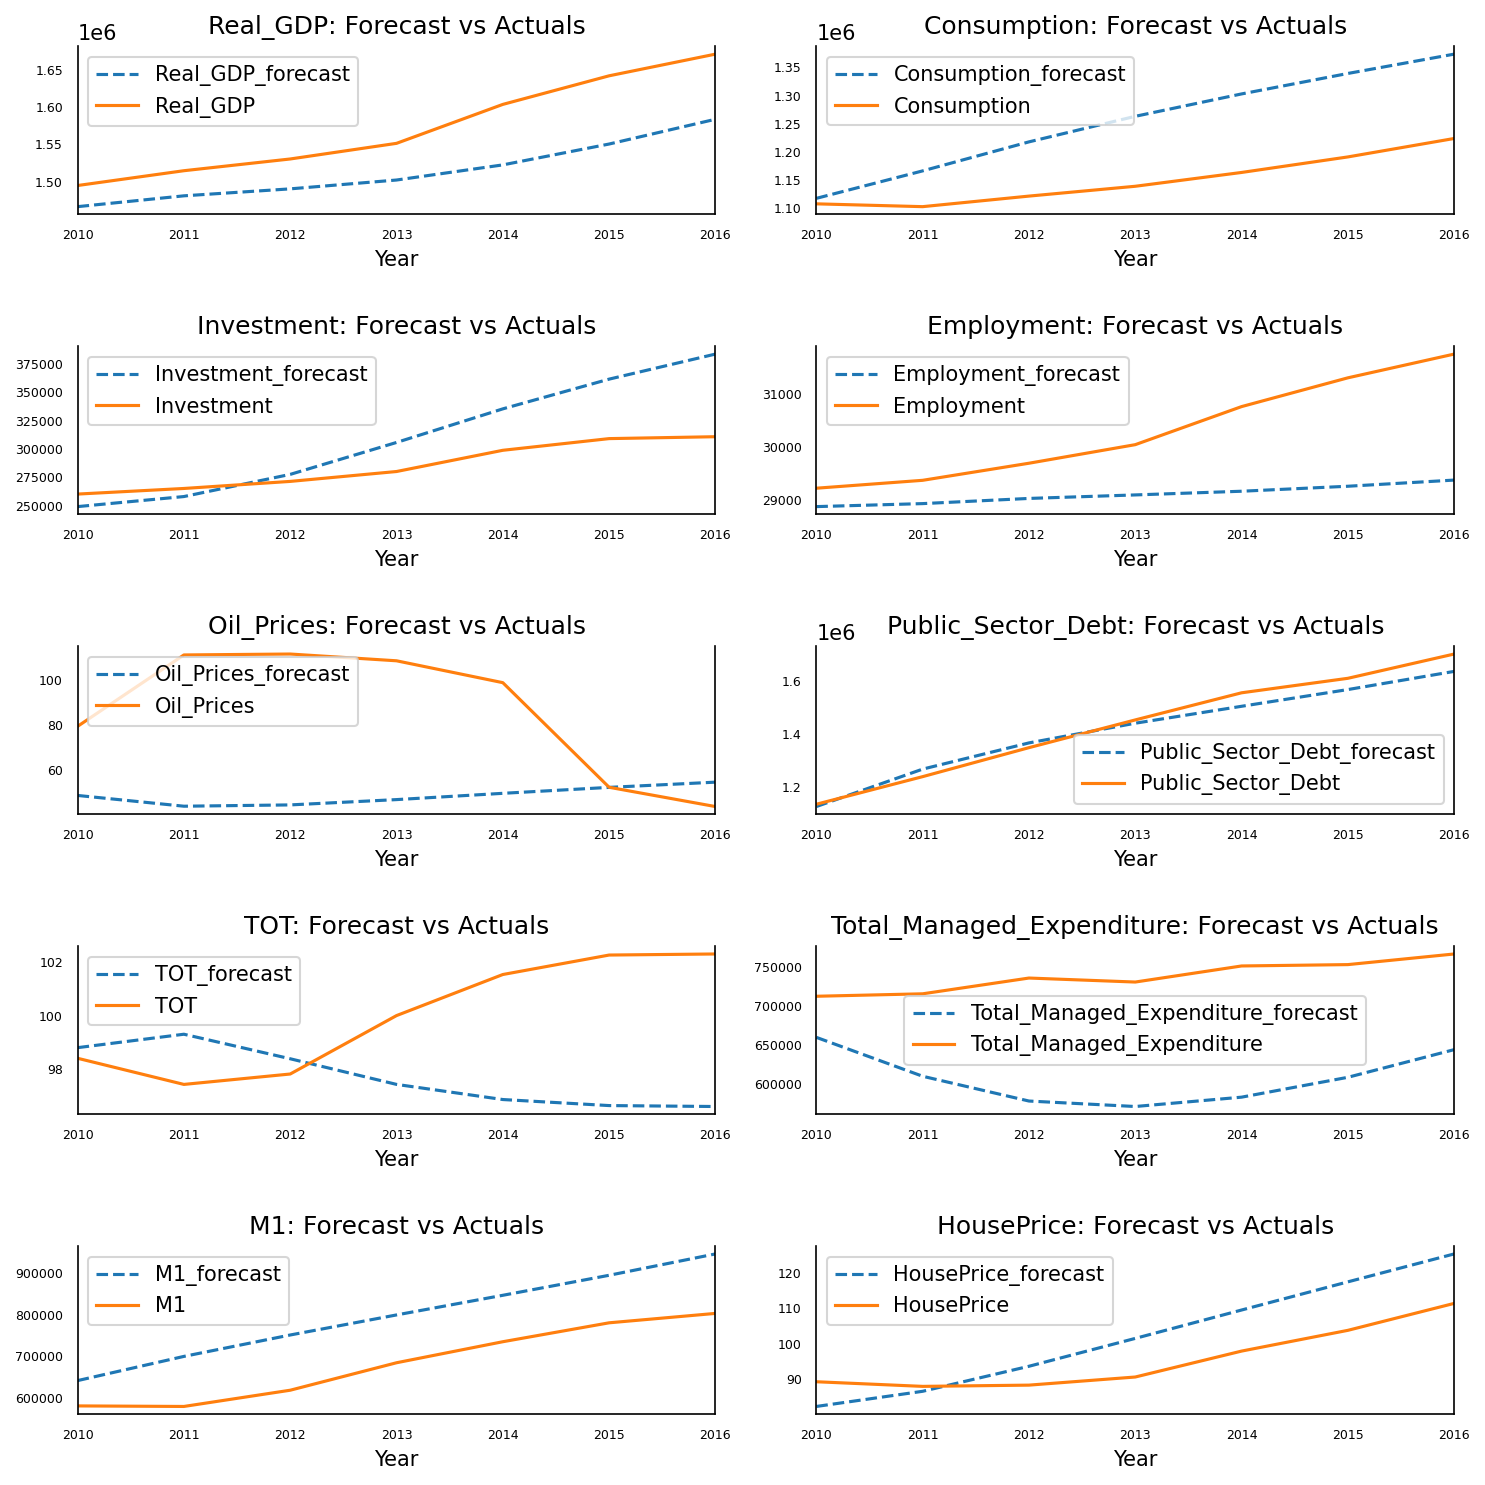

In [117]:
fig, axes = plt.subplots(nrows=int(len(df1_test.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df1_test.columns, axes.flatten())):
    df_var_pred_inv[col+'_forecast'].plot(legend=True, ax=ax, linestyle='--').autoscale(axis='x',tight=True)
    df1_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### 7 VECM model

 7.1 Initiate VAR model on variables levels to find optimal order "p"

In [118]:

var_model_levels = VAR(endog=df1_train_log)
res_var_levels = var_model_levels.select_order(maxlags=3)
res_var_levels.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [119]:
# his time, we see that the suggested number of lags by the AIC is 2 Therefore, for both the Johansen cointegration test and for our VECM model, we will use 2–1 lags.

7.2 Johansen test to find cointegration vectors 

In [120]:
 def johansen_trace(y, p):
        N, l = y.shape
        joh_trace = coint_johansen(y, 0, p)
        r = 0
        for i in range(l):
            if joh_trace.lr1[i] > joh_trace.cvt[i, 1]:
                r = i + 1
        joh_trace.r = r
        return joh_trace

In [121]:
 for i in range(1, 2): 
    # tests for cointegration at i lags
    joh_trace = johansen_trace(df1_train_log, i)
    print('Using the Trace Test, there are', joh_trace.r, '''cointegrating vectors at 
    %s lags between the series''' % i)
    print() 

Using the Trace Test, there are 5 cointegrating vectors at 
   1 lags between the series



In [122]:
j_test = coint_johansen(df1_train_log,0,2)
print ('--------------------------------------------------')
print ('--> Trace Statistics')
print ('variable statistic Crit-90% Crit-95%  Crit-99%')
for i in range(len(j_test.lr1)):
    print ('r =', i, '\t', round(j_test.lr1[i], 4), j_test.cvt[i, 0], j_test.cvt[i, 1], j_test.cvt[i, 2])
print ('--------------------------------------------------')
print ('--> Eigen Statistics')
print ('variable statistic Crit-90% Crit-95%  Crit-99%')
for i in range(len(j_test.lr2)):
    print ('r =', i, '\t', round(j_test.lr2[i], 4), j_test.cvm[i, 0], j_test.cvm[i, 1], j_test.cvm[i, 2])

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 356.9346 232.103 239.2468 253.2526
r = 1 	 284.8533 190.8714 197.3772 210.0366
r = 2 	 222.3426 153.6341 159.529 171.0905
r = 3 	 167.967 120.3673 125.6185 135.9825
r = 4 	 117.6209 91.109 95.7542 104.9637
r = 5 	 74.0478 65.8202 69.8189 77.8202
r = 6 	 44.2309 44.4929 47.8545 54.6815
r = 7 	 23.985 27.0669 29.7961 35.4628
r = 8 	 9.8895 13.4294 15.4943 19.9349
r = 9 	 0.3567 2.7055 3.8415 6.6349
--------------------------------------------------
--> Eigen Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 72.0813 61.2041 64.504 71.2525
r = 1 	 62.5107 55.2412 58.4332 64.996
r = 2 	 54.3756 49.2855 52.3622 58.6634
r = 3 	 50.3461 43.2947 46.2299 52.3069
r = 4 	 43.5731 37.2786 40.0763 45.8662
r = 5 	 29.8169 31.2379 33.8777 39.3693
r = 6 	 20.2459 25.1236 27.5858 32.7172
r = 7 	 14.0955 18.8928 21.1314 25.865
r = 8 	 9.5328 12.2971 14.2639 18.52


7.3 Fit the model

In [123]:
vecm_model = VECM(endog = df1_train_log, k_ar_diff = 1, coint_rank = 5)
vecm_model_fit = vecm_model.fit()

In [124]:
vecm_model_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
    Det. terms outside the coint. relation & lagged endog. parameters for equation Real_GDP     
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
L1.Real_GDP                      0.3061      0.130      2.356      0.018       0.051       0.561
L1.Consumption                  -0.0051      0.168     -0.030      0.976      -0.334       0.324
L1.Investment                   -0.0549      0.026     -2.105      0.035      -0.106      -0.004
L1.Employment                   -0.0648      0.204     -0.319      0.750      -0.464       0.334
L1.Oil_Prices                   -0.0044      0.011     -0.416      0.677      -0.025       0.016
L1.Public_Sector_Debt            0.0071      0.046      0.155      0.877      -0.083       0.097
L1.TOT                           0.0420      0.070      0.602      0.547      -0.095       0.179
L1.Total_Managed_Expenditure     0.0502      0.050      1.012      0.311      -0.047       0.147
L1.M1                            0.2171      0.050      4.315      0.000       0.118       0.316
L1.HousePrice                    0.0538      0.043      1.242      0.214      -0.031       0.139
   Det. terms outside the coint. relation & lagged endog. parameters for equation Consumption   
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
L1.Real_GDP                      0.1567      0.136      1.153      0.249      -0.110       0.423
L1.Consumption                  -0.0282      0.175     -0.161      0.872      -0.372       0.315
L1.Investment                   -0.0177      0.027     -0.650      0.516      -0.071       0.036
L1.Employment                   -0.4615      0.213     -2.169      0.030      -0.879      -0.044
L1.Oil_Prices                    0.0130      0.011      1.165      0.244      -0.009       0.035
L1.Public_Sector_Debt           -0.1200      0.048     -2.500      0.012      -0.214      -0.026
L1.TOT                           0.1505      0.073      2.062      0.039       0.007       0.293
L1.Total_Managed_Expenditure    -0.1618      0.052     -3.121      0.002      -0.263      -0.060
L1.M1                            0.1432      0.053      2.722      0.006       0.040       0.246
L1.HousePrice                    0.0067      0.045      0.147      0.883      -0.082       0.095
   Det. terms outside the coint. relation & lagged endog. parameters for equation Investment    
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
L1.Real_GDP                     -1.0420      0.691     -1.509      0.131      -2.395       0.311
L1.Consumption                   2.3892      0.891      2.681      0.007       0.643       4.136
L1.Investment                    0.0683      0.139      0.493      0.622      -0.203       0.340
L1.Employment                   -0.8399      1.081     -0.777      0.437      -2.959       1.280
L1.Oil_Prices                   -0.0240      0.057     -0.424      0.672      -0.135       0.087
L1.Public_Sector_Debt           -0.4427      0.244     -1.815      0.070      -0.921       0.035
L1.TOT                          -0.7666      0.371     -2.067      0.039      -1.493      -0.040
L1.Total_Managed_Expenditure     0.1969      0.263      0.747      0.455      -0.319       0.713
L1.M1                            0.3129      0.267      1.170      0.242

7.4 Durbin watson 

In [125]:
dw_check_vecm = durbin_watson(vecm_model_fit.resid)

for col, val in zip(df1_train_log_diff.columns, dw_check_vecm):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
Real_GDP --> 1.94
----------------------------
Durbin-Watson statistic for:
Consumption --> 2.16
----------------------------
Durbin-Watson statistic for:
Investment --> 1.99
----------------------------
Durbin-Watson statistic for:
Employment --> 2.32
----------------------------
Durbin-Watson statistic for:
Oil_Prices --> 1.91
----------------------------
Durbin-Watson statistic for:
Public_Sector_Debt --> 2.1
----------------------------
Durbin-Watson statistic for:
TOT --> 2.0
----------------------------
Durbin-Watson statistic for:
Total_Managed_Expenditure --> 1.88
----------------------------
Durbin-Watson statistic for:
M1 --> 2.03
----------------------------
Durbin-Watson statistic for:
HousePrice --> 2.21
----------------------------


In [126]:
vecm_pred = vecm_model_fit.predict(steps=len(df1_test)) 

In [127]:
df_vecm_pred = pd.DataFrame(vecm_pred, 
                        index=df1_test.index, 
                        columns=df1_train.columns + '_forecast')

In [128]:
df_vecm_pred_inv = np.exp(df_vecm_pred)  
df_vecm_pred_inv

Real_GDP_forecast  Consumption_forecast  Investment_forecast  \
Year                                                                 
2010       1.496088e+06          1.114534e+06        242198.642347   
2011       1.544623e+06          1.158522e+06        253104.558487   
2012       1.587342e+06          1.219648e+06        284954.868632   
2013       1.629803e+06          1.287989e+06        334085.413131   
2014       1.675931e+06          1.351150e+06        388295.305601   
2015       1.724230e+06          1.397931e+06        432357.264022   
2016       1.772473e+06          1.424796e+06        455771.430655   

      Employment_forecast  Oil_Prices_forecast  Public_Sector_Debt_forecast  \
Year                                                                          
2010         28986.467205            46.157675                 1.118539e+06   
2011         29214.970813            41.294330                 1.212784e+06   
2012         29528.998946            40.427530                 1.214018e+06   
2013         29843.927796            42.554043                 1.156490e+06   
2014         30147.660047            47.520565                 1.085953e+06   
2015         30405.401855            54.310589                 1.037716e+06   
2016         30588.097378            60.876611                 1.029901e+06   

      TOT_forecast  Total_Managed_Expenditure_forecast    M1_forecast  \
Year                                                                    
2010     99.541019                       696729.868518  612958.502788   
2011    100.650106                       675416.879606  658512.065285   
2012    101.778798                       650478.643148  713559.956265   
2013    102.865007                       637546.589199  769986.647567   
2014    103.333569                       648500.166398  819524.035319   
2015    103.056962                       690694.617369  860611.934436   
2016    102.393788                       764722.753196  897000.866237   

      HousePrice_forecast  
Year                       
2010            82.075686  
2011            85.720450  
2012            94.282040  
2013           107.446679  
2014           123.281267  
2015           138.185265  
2016           148.973334

7.5 Evaluate the predictions

In [129]:
vecm_mape = metrics.mean_absolute_percentage_error(df1_test, df_vecm_pred_inv)
vecm_model_accuracy = 1 - vecm_mape

print("The accuracy of the VECM out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(vecm_model_accuracy, 3))

The accuracy of the VECM out-of-sample prediction is:
----------------------------------------------------
0.856


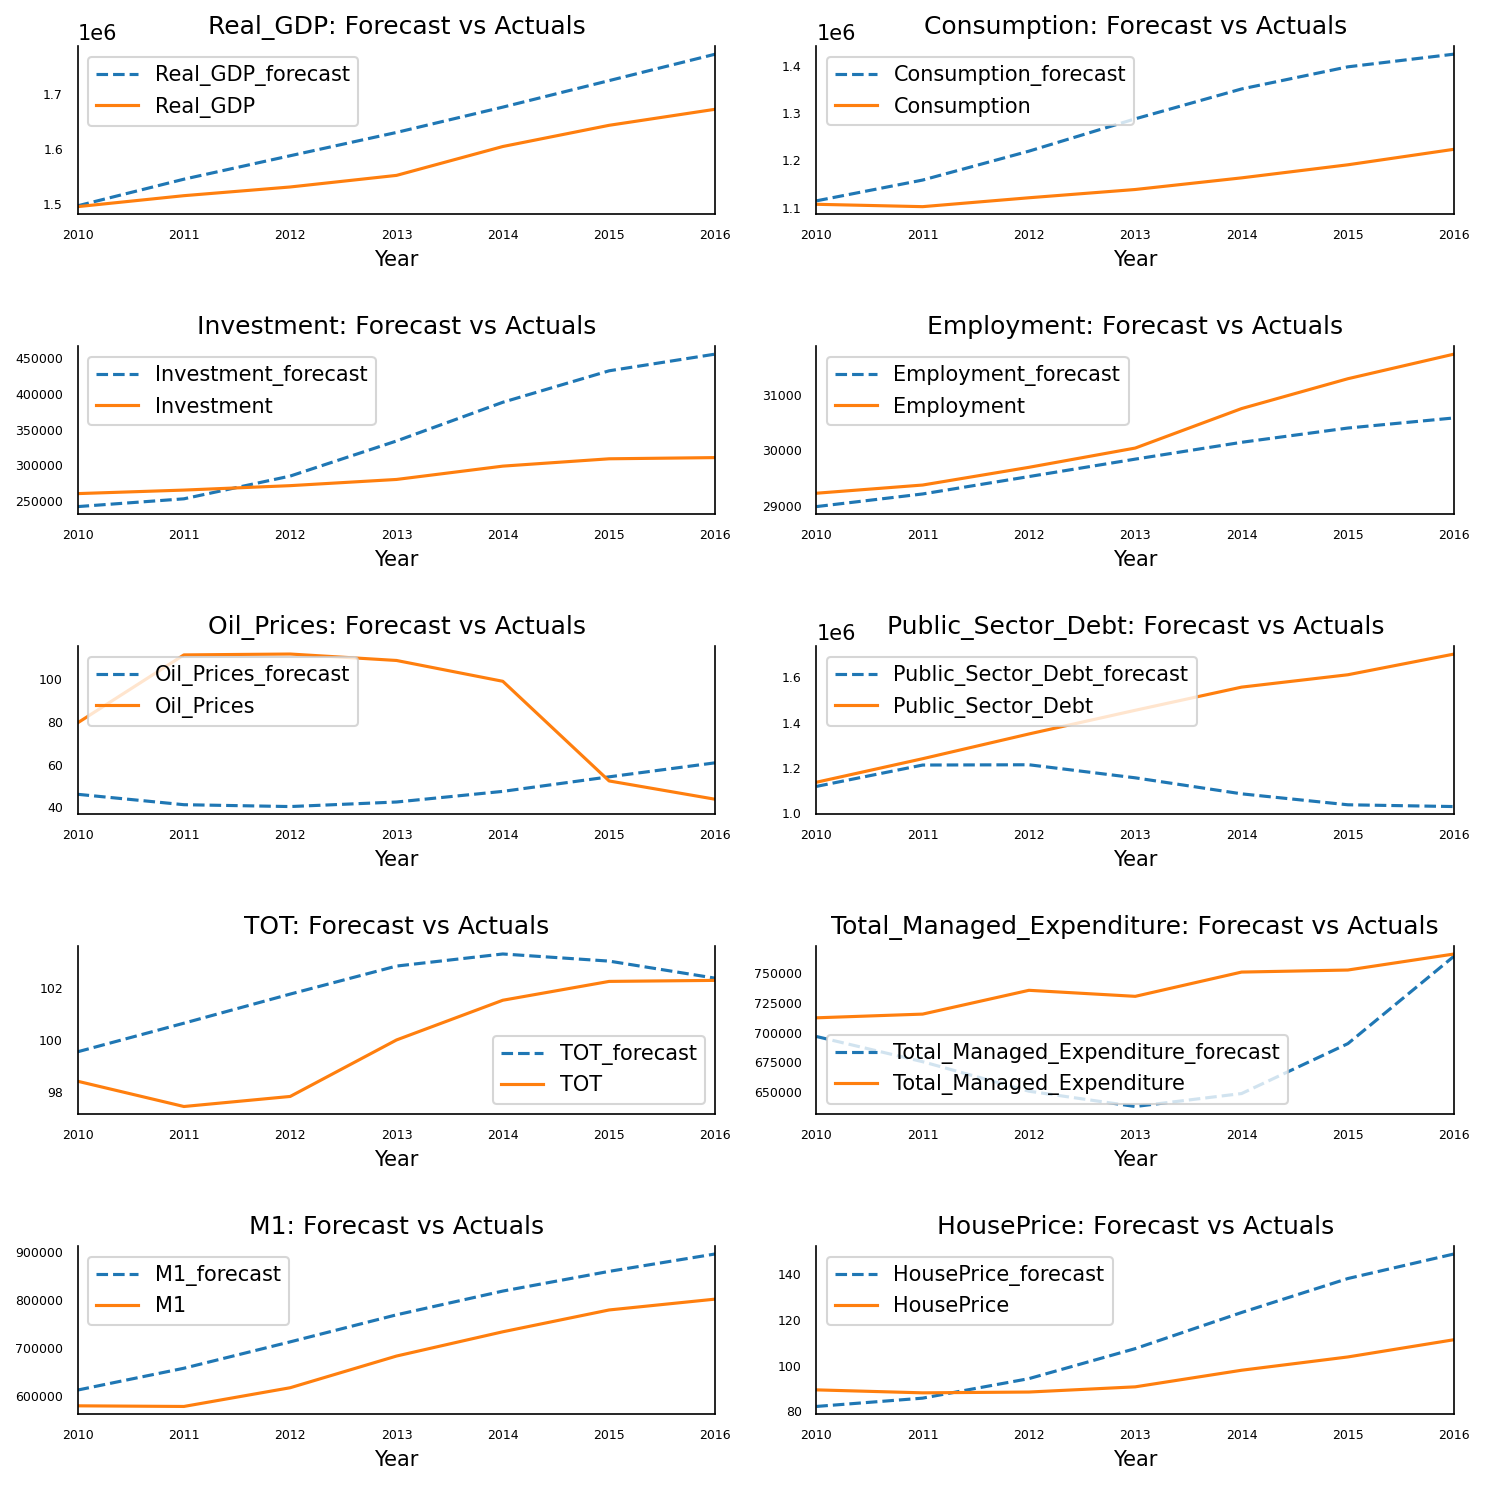

In [130]:
 fig, axes = plt.subplots(nrows=int(len(df1_test.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df1_test.columns, axes.flatten())):
    df_vecm_pred_inv[col+'_forecast'].plot(legend=True, ax=ax, linestyle="--").autoscale(axis='x',tight=True)
    df1_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### 8 VARMAX model

In [131]:
param_grid = {'p': [1,2,3], 'q':[1,2,3], 'tr': ['n','c','t','ct']}
pg = list(ParameterGrid(param_grid))

#tr': This parameter represents the trend type. It can take four values: 'n' for no trend, 'c' for a constant trend, 
#'t' for a linear trend, and 'ct' for a constant with a linear trend.

In [132]:


# Assuming df1_train_log_diff and pg are defined earlier in your code

# Initialize an empty list to store dictionaries
results = []

for b in pg:
    p = b.get('p')
    q = b.get('q')
    tr = b.get('tr')
    model = VARMAX(df1_train_log_diff, order=(p, q), trend=tr, initialization='approximate_diffuse').fit(maxiter=30)
    aic = model.aic

    # Append a dictionary to the list
    results.append({'p': p, 'q': q, 'tr': tr, 'AIC': aic})

# Convert the list of dictionaries to a DataFrame


In [133]:
results


[{'p': 1, 'q': 1, 'tr': 'n', 'AIC': -2398.5733010421936},
 {'p': 1, 'q': 1, 'tr': 'c', 'AIC': -2427.2112187381886},
 {'p': 1, 'q': 1, 'tr': 't', 'AIC': -2412.3913541973766},
 {'p': 1, 'q': 1, 'tr': 'ct', 'AIC': nan},
 {'p': 1, 'q': 2, 'tr': 'n', 'AIC': -2104.1458306319973},
 {'p': 1, 'q': 2, 'tr': 'c', 'AIC': -2121.1899253035613},
 {'p': 1, 'q': 2, 'tr': 't', 'AIC': -2103.441380297767},
 {'p': 1, 'q': 2, 'tr': 'ct', 'AIC': -2136.686868500393},
 {'p': 1, 'q': 3, 'tr': 'n', 'AIC': 238943196233.94867},
 {'p': 1, 'q': 3, 'tr': 'c', 'AIC': -1707.3994401749082},
 {'p': 1, 'q': 3, 'tr': 't', 'AIC': -1681.4334080832778},
 {'p': 1, 'q': 3, 'tr': 'ct', 'AIC': -1732.2009317826},
 {'p': 2, 'q': 1, 'tr': 'n', 'AIC': -2320.648531901856},
 {'p': 2, 'q': 1, 'tr': 'c', 'AIC': nan},
 {'p': 2, 'q': 1, 'tr': 't', 'AIC': nan},
 {'p': 2, 'q': 1, 'tr': 'ct', 'AIC': -2343.1280671115624},
 {'p': 2, 'q': 2, 'tr': 'n', 'AIC': -2005.2609835128974},
 {'p': 2, 'q': 2, 'tr': 'c', 'AIC': -2009.7459299605653},
 {'p': 

In [134]:
df_fitted_VARMA = pd.DataFrame(results)

In [135]:
df_fitted_VARMA.dropna(inplace=True)

In [136]:
sorted_df = df_fitted_VARMA.sort_values(by='AIC', ascending=True)
print(sorted_df)

    p  q  tr           AIC
1   1  1   c -2.427211e+03
2   1  1   t -2.412391e+03
0   1  1   n -2.398573e+03
15  2  1  ct -2.343128e+03
12  2  1   n -2.320649e+03
25  3  1   c -2.170155e+03
7   1  2  ct -2.136687e+03
5   1  2   c -2.121190e+03
4   1  2   n -2.104146e+03
6   1  2   t -2.103441e+03
19  2  2  ct -2.023734e+03
29  3  2   c -2.021751e+03
17  2  2   c -2.009746e+03
16  2  2   n -2.005261e+03
18  2  2   t -1.999099e+03
28  3  2   n -1.907243e+03
11  1  3  ct -1.732201e+03
9   1  3   c -1.707399e+03
10  1  3   t -1.681433e+03
22  2  3   t -1.671952e+03
23  2  3  ct -1.670613e+03
35  3  3  ct -1.593310e+03
33  3  3   c -1.569444e+03
34  3  3   t -1.563940e+03
24  3  1   n  5.708059e+03
21  2  3   c  1.201213e+05
20  2  3   n  4.008612e+06
32  3  3   n  5.406853e+07
27  3  1  ct  2.288631e+09
26  3  1   t  8.581339e+09
31  3  2  ct  2.149232e+10
30  3  2   t  6.755879e+10
8   1  3   n  2.389432e+11


In [137]:
## From the table we get that our best models can be ARMA(1,1) with constant trend or an ARMA(1,1) with linear trend 

In [138]:
## ARMA (1,1,c) Fit the model 


In [139]:
varma_model_C = VARMAX(endog=df1_train_log_diff, order=(1,1), trend='c')
varma_model_fit_C = varma_model_C.fit(maxiter=1000, disp=False)   #the maximum number of iterations for the optimization algorithm to converge during the fitting process.

varma_model_fit_C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                            Statespace Model Results                                                                                           
===============================================================================================================================================================================================================
Dep. Variable:     ['Real_GDP', 'Consumption', 'Investment', 'Employment', 'Oil_Prices', 'Public_Sector_Debt', 'TOT', 'Total_Managed_Expenditure', 'M1', 'HousePrice']   No. Observations:                   87
Model:                                                                                                                                                      VARMA(1,1)   Log Likelihood                1644.720
                                                                                                                                                           + intercept   AIC                          -2759.441
Date:                                                                                                                                                 Mon, 18 Mar 2024   BIC                          -2105.975
Time:                                                                                                                                                         11:23:19   HQIC                         -2496.310
Sample:                                                                                                                                                              0                                         
                                                                                                                                                                  - 87                                         
Covariance Type:                                                                                                                                                   opg                                         
=========================================================================================================================================================================
Ljung-Box (L1) (Q):     0.37, 0.07, 0.04, 0.19, 0.05, 0.07, 0.00, 0.30, 0.06, 0.13   Jarque-Bera (JB):   7.00, 380.13, 866.73, 1.49, 19.51, 78.23, 6.45, 2.95, 0.57, 0.81
Prob(Q):                0.54, 0.79, 0.85, 0.66, 0.82, 0.80, 0.96, 0.59, 0.81, 0.72   Prob(JB):                 0.03, 0.00, 0.00, 0.47, 0.00, 0.00, 0.04, 0.23, 0.75, 0.67
Heteroskedasticity (H): 0.27, 0.31, 0.22, 0.50, 2.05, 4.37, 0.55, 0.38, 0.93, 0.86   Skew:                 -0.21, -1.91, 2.58, 0.16, 0.53, 0.68, -0.50, 0.32, 0.14, -0.09
Prob(H) (two-sided):    0.00, 0.00, 0.00, 0.07, 0.06, 0.00, 0.11, 0.01, 0.84, 0.69   Kurtosis:               4.33, 12.50, 17.58, 3.55, 5.06, 7.44, 3.87, 3.64, 2.72, 3.44
                                   Results for equation Real_GDP                                   
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                           0.0178      0.010      1.743      0.081      -0.002       0.038
L1.Real_GDP                         0.1700      0.025      6.905      0.000       0.122       0.218
L1.Consumption                     -0.0357      0.020     -1.795      0.073      -0.075       0.003
L1.Investment                       0.0377      0.032      1.167      0.243      -0.026       0.101
L1.Employment                       0.1344      0.016      8.538      0.000       0.104       0.165
L1.Oil_Prices                      -0.0175      0.033     -0.536      0.592      -0.081       0.046
L1.Public_Sector_Debt 

In [142]:
dw_check_varma_C = durbin_watson(varma_model_fit_C.resid)

for col, val in zip(df1_train_log_diff.columns, dw_check_varma_C):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
Real_GDP --> 1.86
----------------------------
Durbin-Watson statistic for:
Consumption --> 1.95
----------------------------
Durbin-Watson statistic for:
Investment --> 2.04
----------------------------
Durbin-Watson statistic for:
Employment --> 1.93
----------------------------
Durbin-Watson statistic for:
Oil_Prices --> 1.88
----------------------------
Durbin-Watson statistic for:
Public_Sector_Debt --> 2.0
----------------------------
Durbin-Watson statistic for:
TOT --> 1.87
----------------------------
Durbin-Watson statistic for:
Total_Managed_Expenditure --> 1.81
----------------------------
Durbin-Watson statistic for:
M1 --> 1.99
----------------------------
Durbin-Watson statistic for:
HousePrice --> 1.88
----------------------------


In [143]:
# Prediction VARMA(1,1,c)
varma_pred_C = varma_model_fit_C.forecast(steps=len(df1_test))
df_varma_pred_C = pd.DataFrame(varma_pred_C.values, 
                             index=df1_test.index, 
                             columns=df1_train_log_diff.columns + '_1d')

In [144]:
# Invert transformation for comparison
df_varma_pred_inv_C = invert_transformation(df1_train, df_varma_pred_C)
df_varma_pred_inv_C = df_varma_pred_inv_C.filter(regex='_forecast$',axis=1)
df_varma_pred_inv_C = np.exp(df_varma_pred_inv_C)
df_varma_pred_inv_C.head()

Real_GDP_forecast  Consumption_forecast  Investment_forecast  \
Year                                                                 
2010       1.464779e+06          1.115651e+06        238839.684114   
2011       1.478054e+06          1.163692e+06        246084.466542   
2012       1.488748e+06          1.215000e+06        265674.205191   
2013       1.501873e+06          1.260512e+06        292949.106254   
2014       1.523012e+06          1.300066e+06        321322.054571   

      Employment_forecast  Oil_Prices_forecast  Public_Sector_Debt_forecast  \
Year                                                                          
2010         28890.743627            48.933115                 1.128144e+06   
2011         28911.874438            43.101365                 1.270361e+06   
2012         29001.089778            43.418252                 1.368047e+06   
2013         29078.951272            45.757470                 1.437909e+06   
2014         29160.811504            48.556687                 1.495007e+06   

      TOT_forecast  Total_Managed_Expenditure_forecast    M1_forecast  \
Year                                                                    
2010     98.736691                       664462.663438  637033.505696   
2011     99.241016                       616936.747434  693646.224762   
2012     98.224201                       584833.162467  743946.589312   
2013     97.185426                       576991.811224  789652.622349   
2014     96.550387                       588749.652657  833367.910009   

      HousePrice_forecast  
Year                       
2010            81.741458  
2011            85.305728  
2012            91.999424  
2013            99.693074  
2014           107.502454

In [145]:
# Evaluate the predictions
varma_mape_C = metrics.mean_absolute_percentage_error(df1_test, df_varma_pred_inv_C)
varma_model_accuracy = 1 - varma_mape_C

print("The accuracy of the VARMA(1,1,C) out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(varma_model_accuracy, 3))

The accuracy of the VARMA(1,1,C) out-of-sample prediction is:
----------------------------------------------------
0.887


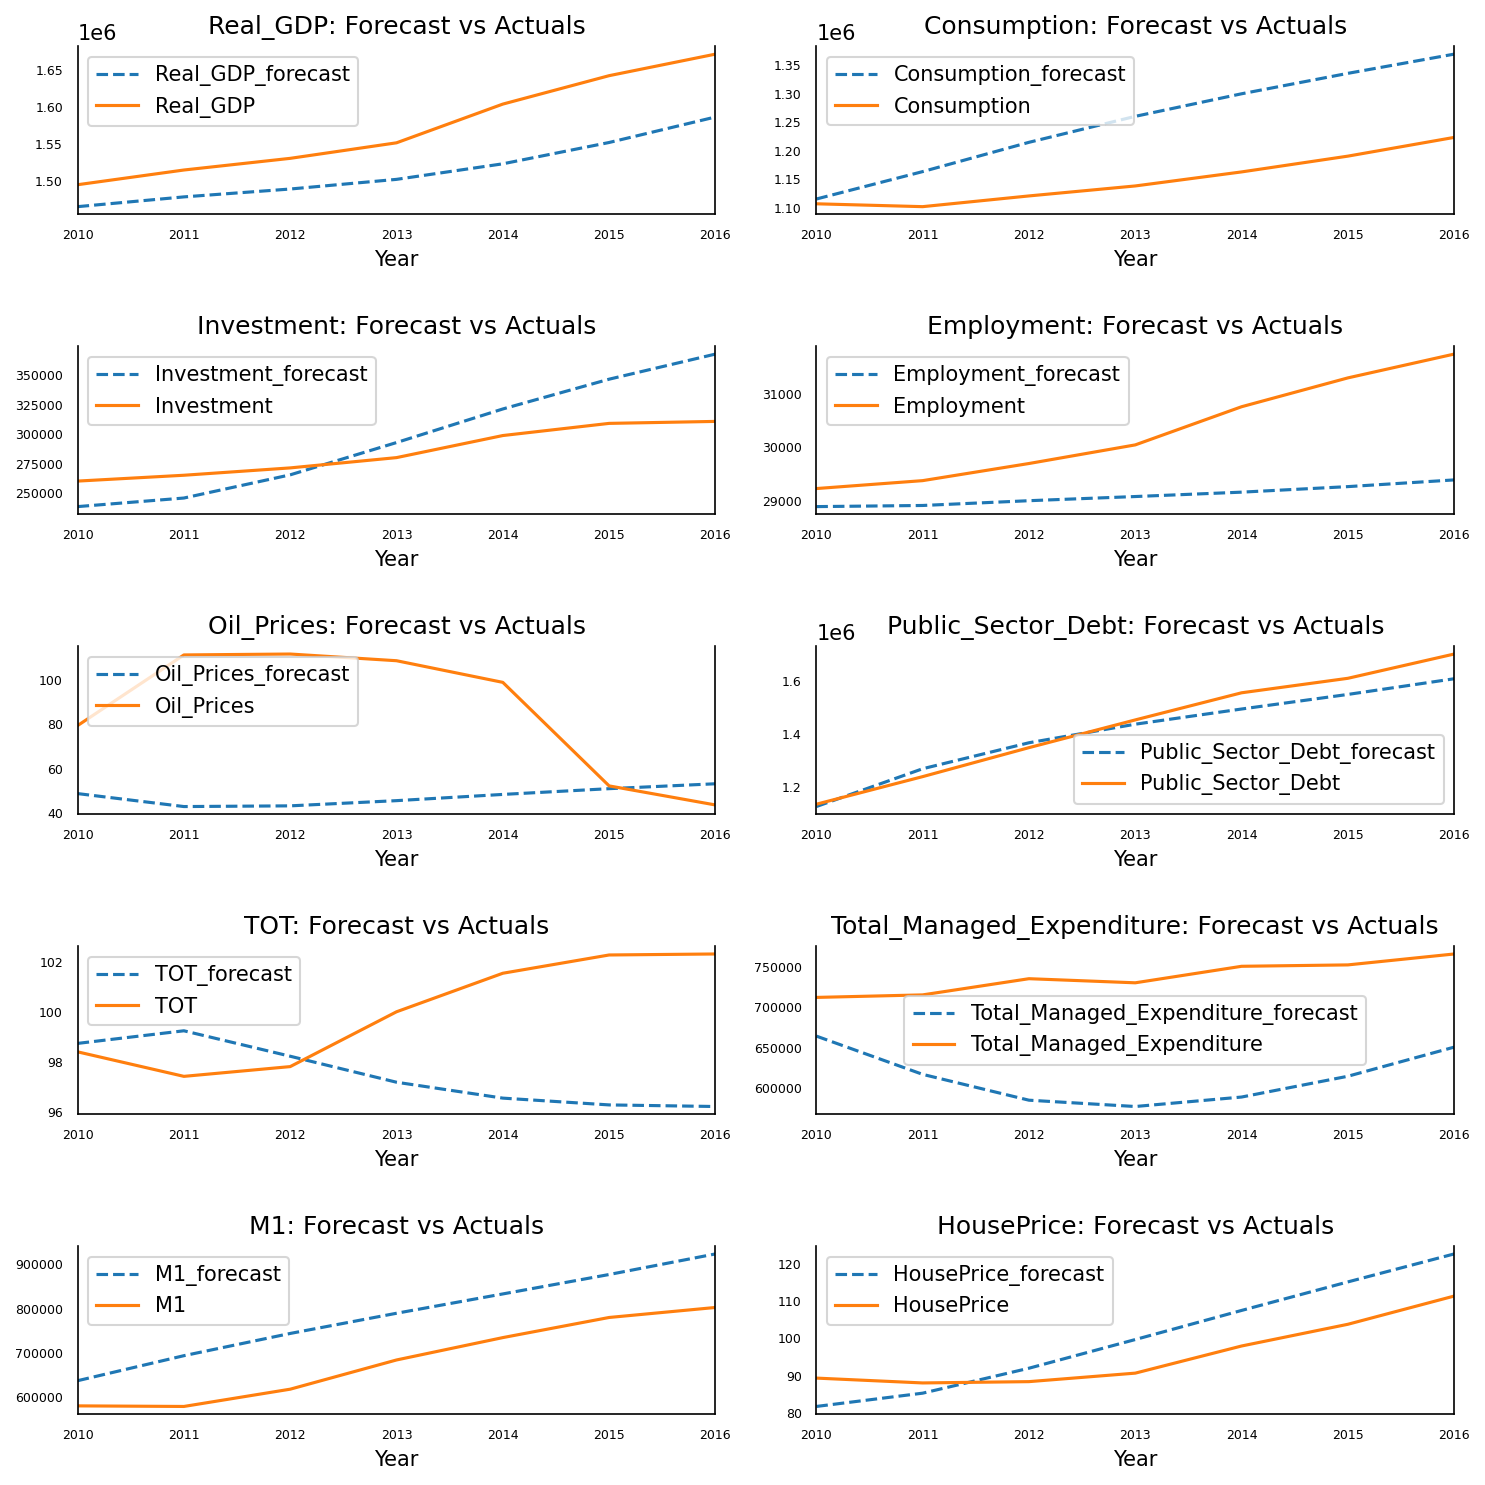

In [147]:
fig, axes = plt.subplots(nrows=int(len(df1_test.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df1_test.columns, axes.flatten())):
    df_varma_pred_inv_C[col+'_forecast'].plot(legend=True, ax=ax, linestyle="--").autoscale(axis='x',tight=True)
    df1_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [148]:
## ARMA (1,1,t) Fit the model 

In [149]:
varma_model_t = VARMAX(endog=df1_train_log_diff, order=(1,1), trend='t')
varma_model_fit_t = varma_model_t.fit(maxiter=1000, disp=False)   #the maximum number of iterations for the optimization algorithm to converge during the fitting process.

varma_model_fit_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                            Statespace Model Results                                                                                           
===============================================================================================================================================================================================================
Dep. Variable:     ['Real_GDP', 'Consumption', 'Investment', 'Employment', 'Oil_Prices', 'Public_Sector_Debt', 'TOT', 'Total_Managed_Expenditure', 'M1', 'HousePrice']   No. Observations:                   87
Model:                                                                                                                                                      VARMA(1,1)   Log Likelihood                1638.621
                                                                                                                                                           + intercept   AIC                          -2747.242
Date:                                                                                                                                                 Mon, 18 Mar 2024   BIC                          -2093.776
Time:                                                                                                                                                         11:40:28   HQIC                         -2484.112
Sample:                                                                                                                                                              0                                         
                                                                                                                                                                  - 87                                         
Covariance Type:                                                                                                                                                   opg                                         
=========================================================================================================================================================================
Ljung-Box (L1) (Q):     0.59, 0.08, 0.00, 0.12, 0.07, 0.01, 0.05, 0.08, 0.00, 0.05   Jarque-Bera (JB):   3.48, 246.59, 943.58, 0.83, 21.12, 46.42, 5.62, 6.64, 0.29, 2.25
Prob(Q):                0.44, 0.78, 0.96, 0.73, 0.79, 0.92, 0.83, 0.78, 0.98, 0.83   Prob(JB):                 0.18, 0.00, 0.00, 0.66, 0.00, 0.00, 0.06, 0.04, 0.86, 0.32
Heteroskedasticity (H): 0.26, 0.23, 0.21, 0.64, 1.63, 3.91, 0.44, 0.28, 0.91, 1.06   Skew:                 0.13, -1.52, 2.61, -0.12, 0.60, 0.01, -0.44, 0.58, 0.11, -0.23
Prob(H) (two-sided):    0.00, 0.00, 0.00, 0.23, 0.20, 0.00, 0.03, 0.00, 0.81, 0.88   Kurtosis:               3.95, 10.67, 18.27, 3.41, 5.09, 6.58, 3.88, 3.68, 2.81, 3.65
                                   Results for equation Real_GDP                                   
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
drift                            9.642e-05      0.000      0.394      0.693      -0.000       0.001
L1.Real_GDP                         0.1817      0.029      6.323      0.000       0.125       0.238
L1.Consumption                      0.1780      0.025      7.051      0.000       0.129       0.227
L1.Investment                       0.0460      0.040      1.160      0.246      -0.032       0.124
L1.Employment                       0.2036      0.011     18.115      0.000       0.182       0.226
L1.Oil_Prices                      -0.0205      0.026     -0.789      0.430      -0.072       0.030
L1.Public_Sector_Debt 

In [150]:
dw_check_varma_t = durbin_watson(varma_model_fit_t.resid)

for col, val in zip(df1_train_log_diff.columns, dw_check_varma):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

NameError: name 'dw_check_varma' is not defined

In [ ]:
# Prediction VARMA(1,1tc)
varma_pred_t = varma_model_fit_t.forecast(steps=len(df1_test))
df_varma_pred_t = pd.DataFrame(varma_pred_t.values, 
                             index=df1_test.index, 
                             columns=df1_train_log_diff.columns + '_1d')

In [ ]:
# Invert transformation for comparison
df_varma_pred_inv_t = invert_transformation(df1_train, df_varma_pred_C)
df_varma_pred_inv_t = df_varma_pred_inv_t.filter(regex='_forecast$',axis=1)
df_varma_pred_inv_t = np.exp(df_varma_pred_inv_t)
df_varma_pred_inv_t.head()

Real_GDP_forecast  Consumption_forecast  Investment_forecast  \
Year                                                                 
2010       1.464779e+06          1.115651e+06        238839.684114   
2011       1.478054e+06          1.163692e+06        246084.466542   
2012       1.488748e+06          1.215000e+06        265674.205191   
2013       1.501873e+06          1.260512e+06        292949.106254   
2014       1.523012e+06          1.300066e+06        321322.054571   

      Employment_forecast  Oil_Prices_forecast  Public_Sector_Debt_forecast  \
Year                                                                          
2010         28890.743627            48.933115                 1.128144e+06   
2011         28911.874438            43.101365                 1.270361e+06   
2012         29001.089778            43.418252                 1.368047e+06   
2013         29078.951272            45.757470                 1.437909e+06   
2014         29160.811504            48.556687                 1.495007e+06   

      TOT_forecast  Total_Managed_Expenditure_forecast    M1_forecast  \
Year                                                                    
2010     98.736691                       664462.663438  637033.505696   
2011     99.241016                       616936.747434  693646.224762   
2012     98.224201                       584833.162467  743946.589312   
2013     97.185426                       576991.811224  789652.622349   
2014     96.550387                       588749.652657  833367.910009   

      HousePrice_forecast  
Year                       
2010            81.741458  
2011            85.305728  
2012            91.999424  
2013            99.693074  
2014           107.502454

In [ ]:
# Evaluate the predictions
varma_mape_t = metrics.mean_absolute_percentage_error(df1_test, df_varma_pred_inv_t)
varma_model_accuracy = 1 - varma_mape_t

print("The accuracy of the VARMA(1,1,t) out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(varma_model_accuracy, 3))

The accuracy of the VARMA(1,1,t) out-of-sample prediction is:
----------------------------------------------------
0.887


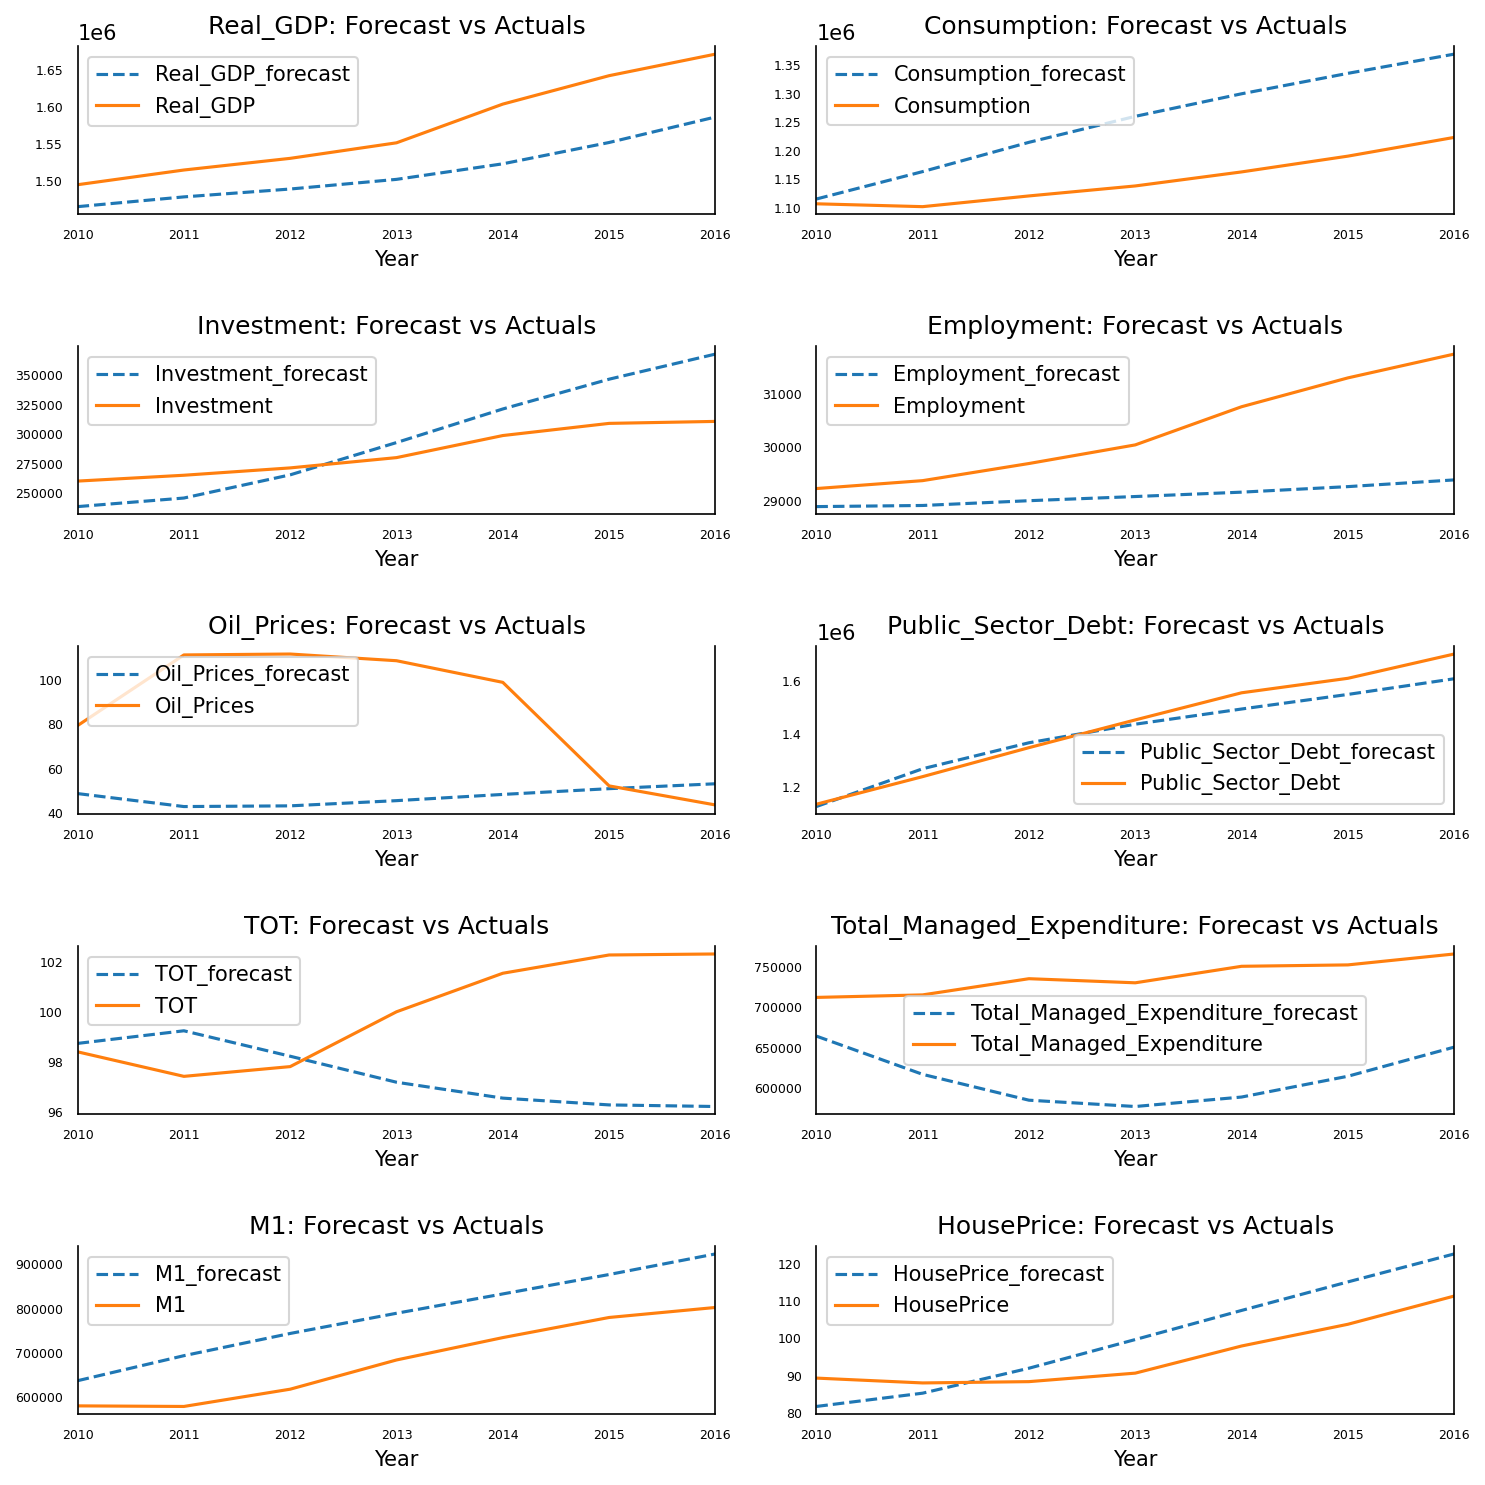

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df1_test.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df1_test.columns, axes.flatten())):
    df_varma_pred_inv_t[col+'_forecast'].plot(legend=True, ax=ax, linestyle="--").autoscale(axis='x',tight=True)
    df1_test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();